### PROJECT : Crypto Trading SMA

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

### 1) Data Analysis

In [2]:
def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    y = (x - min) / (max - min)
    return y

In [3]:
# Import several cryptocurrencies
tickers=['BTC-USD','ETH-USD','USDT-USD','USDC-USD','BNB-USD','XRP-USD','BUSD-USD','HEX-USD','ADA-USD','SOL-USD','DOGE-USD']
end_time = date.today()
df=pdr.get_data_yahoo(tickers, start='2000-1-1', end = end_time)
df


Attributes     Adj Close                                               \
Symbols          BTC-USD      ETH-USD  USDT-USD  USDC-USD     BNB-USD   
Date                                                                    
2014-09-17    457.334015          NaN       NaN       NaN         NaN   
2014-09-18    424.440002          NaN       NaN       NaN         NaN   
2014-09-19    394.795990          NaN       NaN       NaN         NaN   
2014-09-20    408.903992          NaN       NaN       NaN         NaN   
2014-09-21    398.821014          NaN       NaN       NaN         NaN   
...                  ...          ...       ...       ...         ...   
2022-05-17  30425.857422  2090.409180  0.998909  1.000219  305.963440   
2022-05-18  28720.271484  1916.656128  0.998802  0.999771  287.438782   
2022-05-19  30314.333984  2018.336182  0.998971  1.000269  306.791565   
2022-05-20  29200.740234  1961.315674  0.998818  0.999907  302.359222   
2022-05-21  29283.800781  1968.488281  0.998738  1.000401  306.336456   

Attributes                                                     ...  \
Symbols      XRP-USD  BUSD-USD   HEX-USD   ADA-USD    SOL-USD  ...   
Date                                                           ...   
2014-09-17       NaN       NaN       NaN       NaN        NaN  ...   
2014-09-18       NaN       NaN       NaN       NaN        NaN  ...   
2014-09-19       NaN       NaN       NaN       NaN        NaN  ...   
2014-09-20       NaN       NaN       NaN       NaN        NaN  ...   
2014-09-21       NaN       NaN       NaN       NaN        NaN  ...   
...              ...       ...       ...       ...        ...  ...   
2022-05-17  0.437623  1.001801  0.121467  0.578077  57.125626  ...   
2022-05-18  0.406166  1.001879  0.111230  0.505615  49.756210  ...   
2022-05-19  0.419976  1.000839  0.108831  0.533321  52.213978  ...   
2022-05-20  0.411137  1.000234  0.109251  0.517907  49.538509  ...   
2022-05-21  0.410447  1.000929  0.108170  0.526808  49.678093  ...   

Attributes        Volume                                            \
Symbols          ETH-USD      USDT-USD      USDC-USD       BNB-USD   
Date                                                                 
2014-09-17           NaN           NaN           NaN           NaN   
2014-09-18           NaN           NaN           NaN           NaN   
2014-09-19           NaN           NaN           NaN           NaN   
2014-09-20           NaN           NaN           NaN           NaN   
2014-09-21           NaN           NaN           NaN           NaN   
...                  ...           ...           ...           ...   
2022-05-17  1.850993e+10  5.574598e+10  5.271575e+09  1.584498e+09   
2022-05-18  1.774097e+10  5.606725e+10  5.791541e+09  1.520091e+09   
2022-05-19  1.873425e+10  5.965184e+10  6.580258e+09  1.646883e+09   
2022-05-20  1.589248e+10  5.496096e+10  5.519039e+09  1.756671e+09   
2022-05-21  1.427204e+10  4.849142e+10  4.643484e+09  1.628019e+09   

Attributes                                                                     \
Symbols          XRP-USD      BUSD-USD     HEX-USD      ADA-USD       SOL-USD   
Date                                                                            
2014-09-17           NaN           NaN         NaN          NaN           NaN   
2014-09-18           NaN           NaN         NaN          NaN           NaN   
2014-09-19           NaN           NaN         NaN          NaN           NaN   
2014-09-20           NaN           NaN         NaN          NaN           NaN   
2014-09-21           NaN           NaN         NaN          NaN           NaN   
...                  ...           ...         ...          ...           ...   
2022-05-17  1.598582e+09  6.186205e+09  26694520.0  935138863.0  1.823895e+09   
2022-05-18  1.599734e+09  5.858487e+09  17558452.0  933793601.0  1.745566e+09   
2022-05-19  1.557252e+09  7.128538e+09  20994254.0  939230823.0  1.958004e+09   
2022-05-20  1.721878e+09  6.067106e+09  131

In [4]:
## Keep dataframe from the start date fo the youngest maturity to compare them on the same timeframe
date_start_youngest_crypto = '2020-04-15'
line_nbr = np.where(df.index == date_start_youngest_crypto)
df = df['Adj Close'][line_nbr[0][0]:]


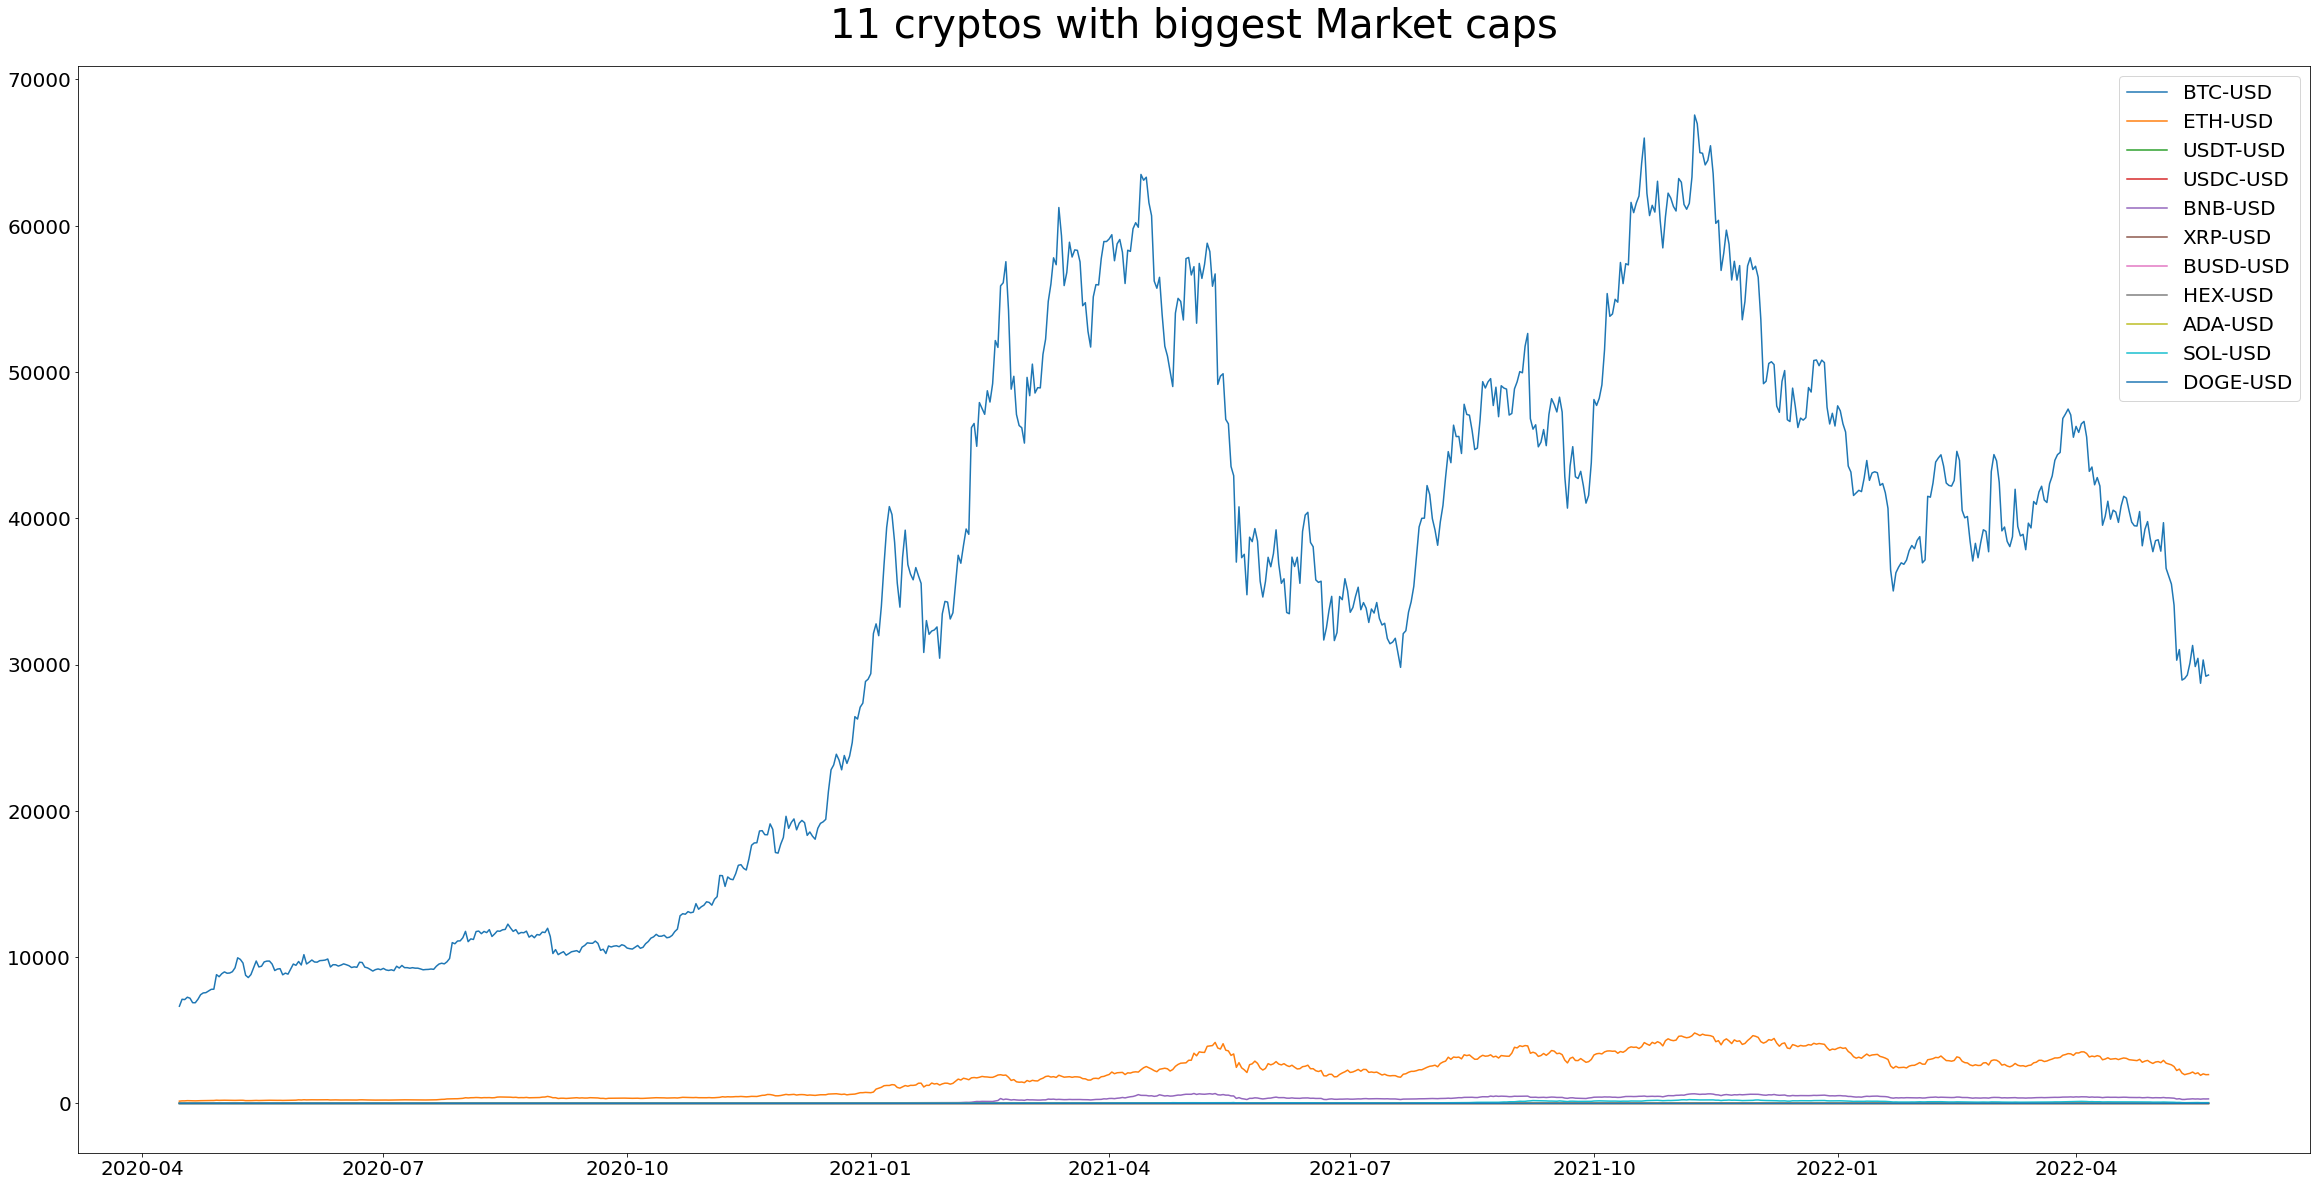

In [5]:
## Plot 1
fig = plt.figure(figsize = (40,20))
plt.title('11 cryptos with biggest Market caps', fontsize = 40, y = 1.02)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(df);
plt.legend(df.columns, fontsize = 20)
plt.show()

In [6]:
## Create normalized dataset
df_n = normalize_data(df)

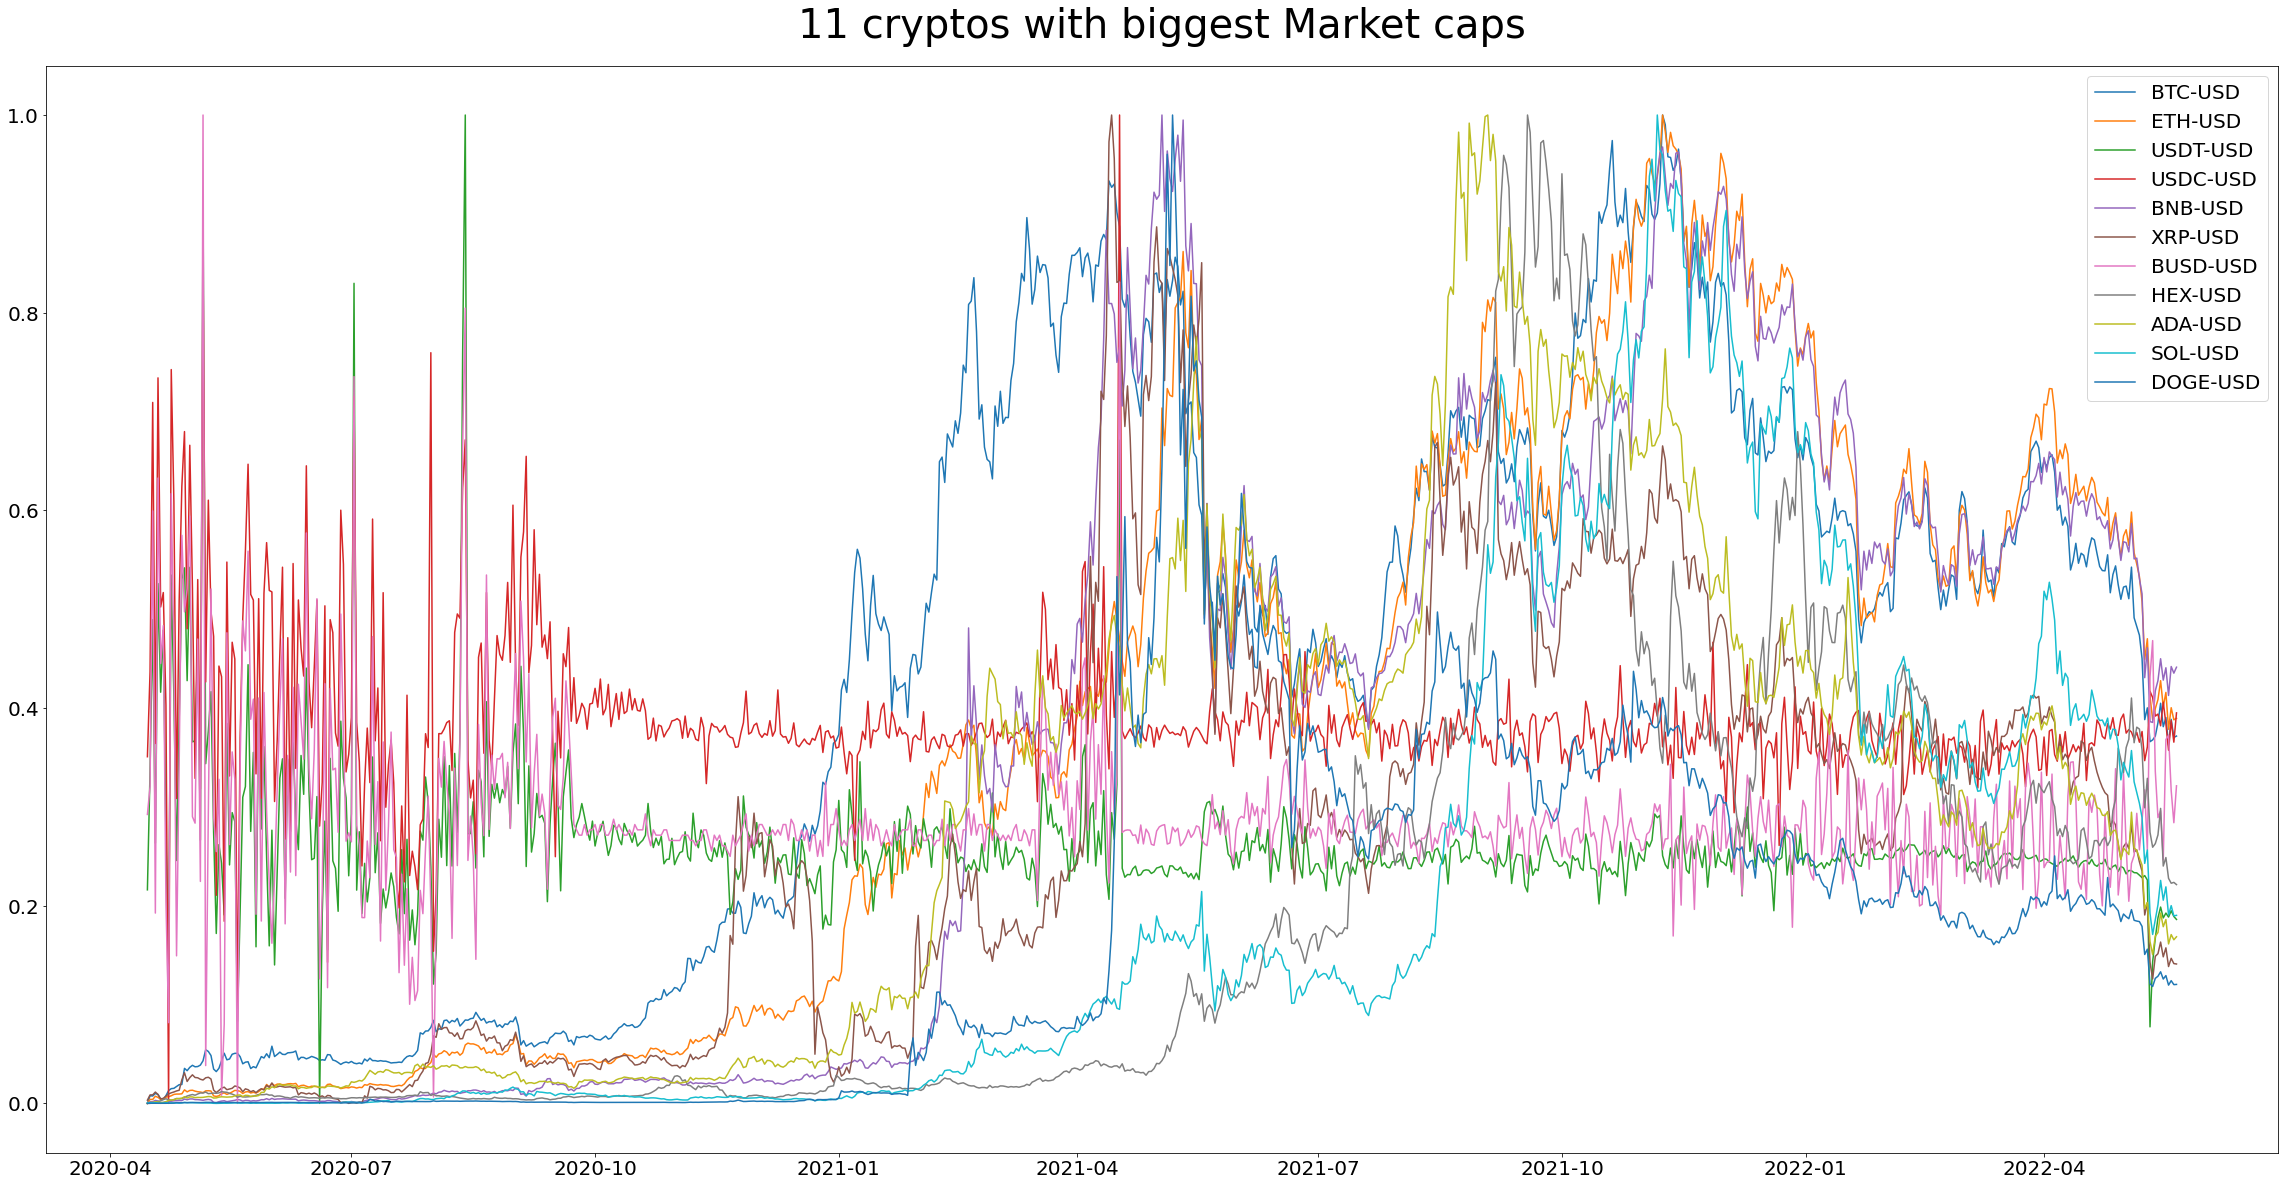

In [7]:
## Plot Normalized data
fig = plt.figure(figsize = (40,20))

plt.plot(df_n)
plt.title('11 cryptos with biggest Market caps', fontsize = 40, y = 1.02)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(df_n.columns, fontsize = 20);

In [8]:
## Find crypto the most correlated
most_corr = df_n.corr()
most_corr

Symbols,BTC-USD,ETH-USD,USDT-USD,USDC-USD,BNB-USD,XRP-USD,BUSD-USD,HEX-USD,ADA-USD,SOL-USD,DOGE-USD
Symbols,,,,,,,,,,,
BTC-USD,1.000000,0.880278,-0.236920,-0.197236,0.872761,0.819190,-0.153344,0.562992,0.831798,0.672663,0.681910
ETH-USD,0.880278,1.000000,-0.242901,-0.229609,0.960043,0.852651,-0.178516,0.764475,0.875288,0.880774,0.792164
USDT-USD,-0.236920,-0.242901,1.000000,0.726198,-0.227403,-0.187907,0.786729,-0.194042,-0.200834,-0.176111,-0.183595
USDC-USD,-0.197236,-0.229609,0.726198,1.000000,-0.183274,-0.152727,0.787489,-0.182800,-0.168599,-0.189416,-0.143851
BNB-USD,0.872761,0.960043,-0.227403,-0.183274,1.000000,0.898633,-0.141355,0.673194,0.852652,0.806358,0.826921
XRP-USD,0.819190,0.852651,-0.187907,-0.152727,0.898633,1.000000,-0.129521,0.596716,0.866772,0.652857,0.877238
BUSD-USD,-0.153344,-0.178516,0.786729,0.787489,-0.141355,-0.129521,1.000000,-0.142594,-0.139044,-0.147163,-0.124643
HEX-USD,0.562992,0.764475,-0.194042,-0.182800,0.673194,0.596716,-0.142594,1.000000,0.764558,0.847160,0.530865
ADA-USD,0.831798,0.875288,-0.200834,-0.168599,0.852652,0.866772,-0.139044,0.764558,1.000000,0.716370,0.838689


In [9]:
## Get the most correlated cryptocurrencies with crypto reference (BTC)
most_corr = df_n.corr()['BTC-USD'].sort_values(ascending = False)
most_corr

Symbols
BTC-USD     1.000000
ETH-USD     0.880278
BNB-USD     0.872761
ADA-USD     0.831798
XRP-USD     0.819190
DOGE-USD    0.681910
SOL-USD     0.672663
HEX-USD     0.562992
BUSD-USD   -0.153344
USDC-USD   -0.197236
USDT-USD   -0.236920
Name: BTC-USD, dtype: float64

In [10]:
## Arbitrary strategy selection : keep only cryptocurrencies most correlated with BTC (reference)
## with large vol and large trend
df_most_corr = df_n[['BTC-USD','ETH-USD','BNB-USD','ADA-USD','XRP-USD','DOGE-USD','SOL-USD','HEX-USD']]
df_most_corr

Symbols,BTC-USD,ETH-USD,BNB-USD,ADA-USD,XRP-USD,DOGE-USD,SOL-USD,HEX-USD
Date,,,,,,,,
2020-04-15,0.000000,0.000000,0.000000,0.000000,0.003246,0.000000,0.000508,0.000000
2020-04-16,0.007791,0.004051,0.001677,0.000867,0.008557,0.000129,0.000679,0.000049
2020-04-17,0.007453,0.003939,0.001726,0.000923,0.008616,0.000107,0.000563,0.000253
2020-04-18,0.010104,0.007218,0.003024,0.001597,0.011456,0.000177,0.000642,0.001133
2020-04-19,0.008983,0.006081,0.002339,0.001346,0.009011,0.000173,0.000355,0.002075
...,...,...,...,...,...,...,...,...
2022-05-17,0.390379,0.415799,0.440741,0.186016,0.157363,0.129274,0.219064,0.248724
2022-05-18,0.362384,0.378503,0.412720,0.161339,0.138452,0.119661,0.190547,0.227669
2022-05-19,0.388549,0.400328,0.441994,0.170774,0.146754,0.124163,0.200058,0.222735


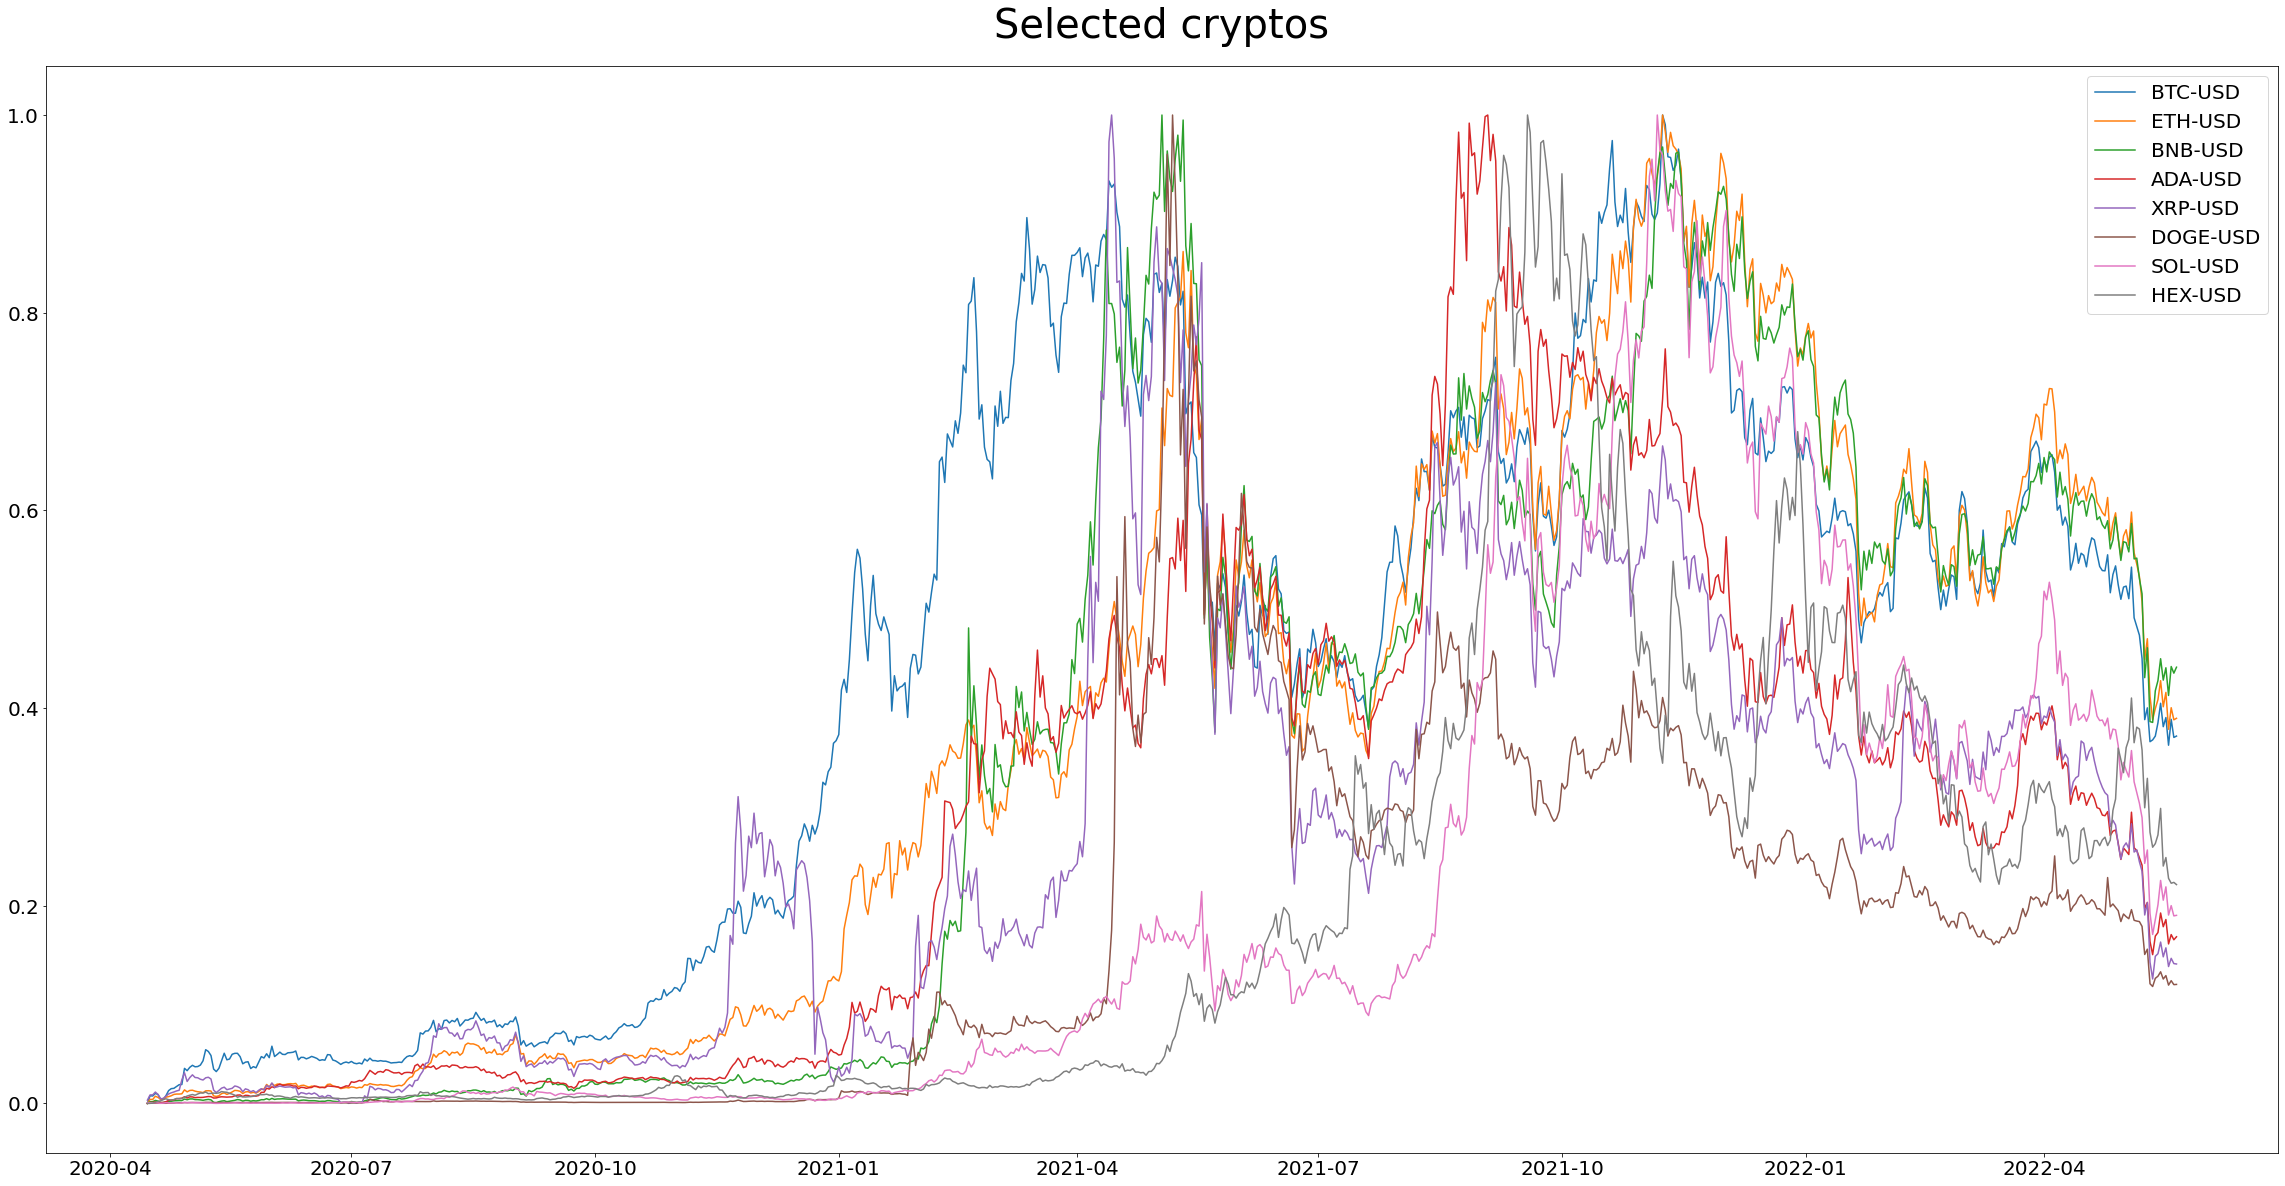

In [11]:
fig = plt.figure(figsize = (40,20))

plt.plot(df_most_corr)
plt.title('Selected cryptos', fontsize = 40, y = 1.02)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(df_most_corr.columns, fontsize = 20);

### 2) Optimization

In [12]:
!pip install optuna

In [13]:
## Create a copy of selected stocks df
closes_stocks = df_most_corr.copy().reset_index()
closes_stocks

Symbols,Date,BTC-USD,ETH-USD,BNB-USD,ADA-USD,XRP-USD,DOGE-USD,SOL-USD,HEX-USD
0,2020-04-15,0.000000,0.000000,0.000000,0.000000,0.003246,0.000000,0.000508,0.000000
1,2020-04-16,0.007791,0.004051,0.001677,0.000867,0.008557,0.000129,0.000679,0.000049
2,2020-04-17,0.007453,0.003939,0.001726,0.000923,0.008616,0.000107,0.000563,0.000253
3,2020-04-18,0.010104,0.007218,0.003024,0.001597,0.011456,0.000177,0.000642,0.001133
4,2020-04-19,0.008983,0.006081,0.002339,0.001346,0.009011,0.000173,0.000355,0.002075
...,...,...,...,...,...,...,...,...,...
762,2022-05-17,0.390379,0.415799,0.440741,0.186016,0.157363,0.129274,0.219064,0.248724
763,2022-05-18,0.362384,0.378503,0.412720,0.161339,0.138452,0.119661,0.190547,0.227669
764,2022-05-19,0.388549,0.400328,0.441994,0.170774,0.146754,0.124163,0.200058,0.222735
765,2022-05-20,0.370271,0.388089,0.435289,0.165525,0.141440,0.120141,0.189704,0.223599


In [14]:
tickers = list(closes_stocks.columns)
tickers.pop(0)
tickers

['BTC-USD',
 'ETH-USD',
 'BNB-USD',
 'ADA-USD',
 'XRP-USD',
 'DOGE-USD',
 'SOL-USD',
 'HEX-USD']

In [17]:
# Implement optimization objective function
import math
import sys
import optuna
import warnings
warnings.filterwarnings('ignore')

def objective(trial):
    print('--------- We are working with {} ticker ---------'.format(TICKER))
    # 1 - Import
    df = closes_stocks.copy()

    # 2 - Re-adjust
    df_target = df[['Date', TICKER]]
    df_target['Date'] = pd.to_datetime(df_target['Date'])

    # 3 - Add information (SMA Short and Long) + CROSSSMA => 1 if cross else 0

    SMASHORT_ = trial.suggest_int("sma_one(short)",1,100)
    SMALONG_ = trial.suggest_int("sma_two(long)",SMASHORT_,100) 
        
    df_target['SMAShort'] = df_target[TICKER].rolling(window=SMASHORT_).mean()
    df_target['SMALong'] = df_target[TICKER].rolling(window=SMALONG_).mean()
    df_target['CROSS'] = np.where(df_target['SMAShort'] >= df_target['SMALong'], 1, 0)

    # 3 - Add information (Returns) => 1 if positive else 0
    df_target['Returns'] = np.where(df_target[TICKER].pct_change() > 0, 1, 0)

    # 3 - Add information (Signal state) 1 = BUY , 2 = HOLD, 3 = SELL
    temp = [0]
    for i in range(1, len(df_target)):
        if df_target['CROSS'].iloc[i - 1] == 0 and df_target['CROSS'].iloc[i] == 1:
            temp.append('BUY')
        elif df_target['CROSS'].iloc[i - 1] == 1 and df_target['CROSS'].iloc[i] == 1:
            temp.append('HOLD')
        elif df_target['CROSS'].iloc[i - 1] == 0 and df_target['CROSS'].iloc[i] == 0:
            temp.append('HOLD')
        elif df_target['CROSS'].iloc[i - 1] == 1 and df_target['CROSS'].iloc[i] == 0:
            temp.append('SELL')

    df_target['Signal'] = temp
    df_target = df_target.iloc[1:]

    df_sell = df_target[df_target['Signal'] == 'SELL']
    df_buy = df_target[df_target['Signal'] == 'BUY']

    transact_cost = 0.01
    total_pnl = 0
    for i in range(0,len(df_sell)):
        total_pnl += (df_sell[TICKER].iloc[i] - df_buy[TICKER].iloc[i]) *(1-transact_cost)

    return total_pnl

In [18]:
## Run the optimization
d={}
TRIALS = 100
for ticker in tickers:
    TICKER = ticker
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=TRIALS)
    study.best_trial
    if not ticker in d.keys():
        d[ticker]=[]
        d[ticker].append(study.best_trial.params['sma_one(short)'])
        d[ticker].append(study.best_trial.params['sma_two(long)'])

print(d)

[I 2022-05-21 12:41:37,073] A new study created in memory with name: no-name-5d0bf010-5bfe-43fe-b604-402653a96c4d


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:37,464] Trial 0 finished with value: 0.6615108231475763 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 89}. Best is trial 0 with value: 0.6615108231475763.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:37,795] Trial 1 finished with value: 0.6390466761605917 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 40}. Best is trial 0 with value: 0.6615108231475763.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:38,244] Trial 2 finished with value: 0.5786089208791816 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 68}. Best is trial 0 with value: 0.6615108231475763.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:38,564] Trial 3 finished with value: 0.3183848769304761 and parameters: {'sma_one(short)': 94, 'sma_two(long)': 96}. Best is trial 0 with value: 0.6615108231475763.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:38,815] Trial 4 finished with value: 0.5278436540331061 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 93}. Best is trial 0 with value: 0.6615108231475763.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:39,161] Trial 5 finished with value: 0.4781720430254029 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 18}. Best is trial 0 with value: 0.6615108231475763.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:39,472] Trial 6 finished with value: 0.35442850059984127 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 56}. Best is trial 0 with value: 0.6615108231475763.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:39,761] Trial 7 finished with value: 0.795708610290798 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 79}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:40,086] Trial 8 finished with value: 0.0 and parameters: {'sma_one(short)': 84, 'sma_two(long)': 84}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:40,437] Trial 9 finished with value: 0.19756235200070774 and parameters: {'sma_one(short)': 65, 'sma_two(long)': 77}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:40,854] Trial 10 finished with value: 0.21096462276386294 and parameters: {'sma_one(short)': 62, 'sma_two(long)': 78}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:41,253] Trial 11 finished with value: 0.42702338807074935 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 57}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:41,549] Trial 12 finished with value: 0.5926920546467508 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 99}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:41,870] Trial 13 finished with value: 0.208512240103439 and parameters: {'sma_one(short)': 51, 'sma_two(long)': 85}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:42,215] Trial 14 finished with value: 0.7194311340448389 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 67}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:42,592] Trial 15 finished with value: 0.5628987362196959 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 67}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:42,950] Trial 16 finished with value: 0.5087616852134121 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 60}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:43,238] Trial 17 finished with value: 0.5392907089173662 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 44}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:43,530] Trial 18 finished with value: 0.43013032340926194 and parameters: {'sma_one(short)': 36, 'sma_two(long)': 72}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:43,847] Trial 19 finished with value: 0.17793808577941883 and parameters: {'sma_one(short)': 55, 'sma_two(long)': 78}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:44,178] Trial 20 finished with value: 0.375953775176064 and parameters: {'sma_one(short)': 79, 'sma_two(long)': 85}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:44,465] Trial 21 finished with value: 0.6816040574472101 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 45}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:44,747] Trial 22 finished with value: 0.5560305508952786 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 47}. Best is trial 7 with value: 0.795708610290798.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:45,054] Trial 23 finished with value: 1.0138057752706675 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 30}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:45,333] Trial 24 finished with value: 0.6747431558621075 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 30}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:45,616] Trial 25 finished with value: 0.0 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 1}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:45,918] Trial 26 finished with value: 0.6258709471457005 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 63}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:46,228] Trial 27 finished with value: 0.41688829491102475 and parameters: {'sma_one(short)': 43, 'sma_two(long)': 72}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:46,522] Trial 28 finished with value: 0.6839104955532216 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 54}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:46,840] Trial 29 finished with value: 0.5408332747807207 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 73}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:47,185] Trial 30 finished with value: 0.5641056470634869 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 34}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:47,517] Trial 31 finished with value: 0.360084538405143 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 20}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:47,874] Trial 32 finished with value: 0.5954042716155294 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 51}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:48,207] Trial 33 finished with value: 0.6953254480308741 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 53}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:48,495] Trial 34 finished with value: 0.6496283307757587 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 65}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:48,873] Trial 35 finished with value: 0.375509419471743 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 91}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:49,245] Trial 36 finished with value: 0.1886657325551372 and parameters: {'sma_one(short)': 46, 'sma_two(long)': 81}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:49,592] Trial 37 finished with value: 0.5280598493804265 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 35}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:49,949] Trial 38 finished with value: 0.530247097582319 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:50,285] Trial 39 finished with value: 0.5315625821611636 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 40}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:50,621] Trial 40 finished with value: 0.5689681381326275 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 70}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:50,969] Trial 41 finished with value: 0.7354486956771373 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 53}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:51,267] Trial 42 finished with value: 0.44356679124915477 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 52}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:51,735] Trial 43 finished with value: 0.6427897723387063 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 59}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:52,049] Trial 44 finished with value: 0.4488216362497767 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 19}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:52,440] Trial 45 finished with value: -0.1271903062551829 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 23}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:52,852] Trial 46 finished with value: 0.6080020938366214 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 50}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:53,243] Trial 47 finished with value: 0.3414177585950862 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 55}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:53,616] Trial 48 finished with value: 0.21888415793751867 and parameters: {'sma_one(short)': 69, 'sma_two(long)': 72}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:53,939] Trial 49 finished with value: 0.5076870718307638 and parameters: {'sma_one(short)': 49, 'sma_two(long)': 58}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:54,239] Trial 50 finished with value: 0.0 and parameters: {'sma_one(short)': 100, 'sma_two(long)': 100}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:54,579] Trial 51 finished with value: 0.6530911378743279 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 66}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:54,953] Trial 52 finished with value: 0.32034337763298343 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 7}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:55,296] Trial 53 finished with value: 0.6484862594937081 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 54}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:55,728] Trial 54 finished with value: 0.4783219071519511 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 40}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:56,080] Trial 55 finished with value: 0.6696741810980656 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 46}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:56,387] Trial 56 finished with value: 0.5511440822006392 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 49}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:56,761] Trial 57 finished with value: 0.717077470648631 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 54}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:57,178] Trial 58 finished with value: 0.5936103135991915 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 43}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:57,527] Trial 59 finished with value: 0.35432389404306386 and parameters: {'sma_one(short)': 40, 'sma_two(long)': 57}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:57,869] Trial 60 finished with value: 0.5956183246865808 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 62}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:58,295] Trial 61 finished with value: 0.635822582113237 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 75}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:58,639] Trial 62 finished with value: 0.48988021758377964 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 88}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:58,983] Trial 63 finished with value: 0.4786680196534494 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 53}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:59,417] Trial 64 finished with value: 0.6421553729262586 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 48}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:41:59,798] Trial 65 finished with value: 0.4729943358391769 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 82}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:00,135] Trial 66 finished with value: 0.629598095267146 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 69}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:00,511] Trial 67 finished with value: 0.4209407516510894 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 29}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:00,856] Trial 68 finished with value: 0.4005835413089812 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 56}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:01,231] Trial 69 finished with value: 0.4675609043412896 and parameters: {'sma_one(short)': 44, 'sma_two(long)': 53}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:01,579] Trial 70 finished with value: 0.5731438630360792 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 64}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:02,008] Trial 71 finished with value: 0.6232022580569643 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 37}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:02,380] Trial 72 finished with value: 0.6278516957839786 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 43}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:02,749] Trial 73 finished with value: 0.29675774108484293 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 29}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:03,123] Trial 74 finished with value: 0.6129514978474293 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 60}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:03,480] Trial 75 finished with value: 0.4103119510892922 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 46}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:03,835] Trial 76 finished with value: 0.4363614275087173 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 50}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:04,201] Trial 77 finished with value: 0.7410323404132608 and parameters: {'sma_one(short)': 59, 'sma_two(long)': 60}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:04,498] Trial 78 finished with value: 0.5119222409335012 and parameters: {'sma_one(short)': 54, 'sma_two(long)': 56}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:04,867] Trial 79 finished with value: 0.0 and parameters: {'sma_one(short)': 63, 'sma_two(long)': 63}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:05,223] Trial 80 finished with value: 0.0 and parameters: {'sma_one(short)': 72, 'sma_two(long)': 72}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:05,564] Trial 81 finished with value: 0.737325742275285 and parameters: {'sma_one(short)': 61, 'sma_two(long)': 62}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:05,967] Trial 82 finished with value: 0.7435323292129957 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 59}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:06,394] Trial 83 finished with value: 0.7580699746612716 and parameters: {'sma_one(short)': 60, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:06,774] Trial 84 finished with value: 0.7848246090848718 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 60}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:07,153] Trial 85 finished with value: 0.7557735338445146 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:07,521] Trial 86 finished with value: 0.7557735338445146 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:07,877] Trial 87 finished with value: 0.7557735338445146 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:08,274] Trial 88 finished with value: 0.7410323404132608 and parameters: {'sma_one(short)': 59, 'sma_two(long)': 60}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:08,666] Trial 89 finished with value: 0.6267106400995666 and parameters: {'sma_one(short)': 56, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:08,990] Trial 90 finished with value: 0.0 and parameters: {'sma_one(short)': 67, 'sma_two(long)': 67}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:09,370] Trial 91 finished with value: 0.679667820549187 and parameters: {'sma_one(short)': 57, 'sma_two(long)': 60}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:09,739] Trial 92 finished with value: 0.7110661006195187 and parameters: {'sma_one(short)': 59, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:10,129] Trial 93 finished with value: 0.4294315922338936 and parameters: {'sma_one(short)': 52, 'sma_two(long)': 59}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:10,460] Trial 94 finished with value: 0.7110661006195187 and parameters: {'sma_one(short)': 59, 'sma_two(long)': 61}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:10,872] Trial 95 finished with value: 0.566730268735935 and parameters: {'sma_one(short)': 49, 'sma_two(long)': 64}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:11,261] Trial 96 finished with value: 0.0 and parameters: {'sma_one(short)': 65, 'sma_two(long)': 65}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:11,664] Trial 97 finished with value: 0.0 and parameters: {'sma_one(short)': 73, 'sma_two(long)': 73}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:12,052] Trial 98 finished with value: 0.46558156801847805 and parameters: {'sma_one(short)': 54, 'sma_two(long)': 59}. Best is trial 23 with value: 1.0138057752706675.


--------- We are working with BTC-USD ticker ---------


[I 2022-05-21 12:42:12,396] Trial 99 finished with value: 0.7297176464649962 and parameters: {'sma_one(short)': 59, 'sma_two(long)': 62}. Best is trial 23 with value: 1.0138057752706675.
[I 2022-05-21 12:42:12,398] A new study created in memory with name: no-name-2435a5a5-79af-401d-8e99-30446a25ec6f


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:12,813] Trial 0 finished with value: 0.1331880940976025 and parameters: {'sma_one(short)': 80, 'sma_two(long)': 87}. Best is trial 0 with value: 0.1331880940976025.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:13,140] Trial 1 finished with value: 0.457313459506225 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 60}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:13,509] Trial 2 finished with value: 0.36455137180226 and parameters: {'sma_one(short)': 63, 'sma_two(long)': 88}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:13,780] Trial 3 finished with value: 0.22960744951635018 and parameters: {'sma_one(short)': 88, 'sma_two(long)': 92}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:14,156] Trial 4 finished with value: 0.30406324749037195 and parameters: {'sma_one(short)': 50, 'sma_two(long)': 62}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:14,484] Trial 5 finished with value: 0.06429473549235282 and parameters: {'sma_one(short)': 86, 'sma_two(long)': 88}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:14,806] Trial 6 finished with value: 0.20783372798594502 and parameters: {'sma_one(short)': 78, 'sma_two(long)': 82}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:15,161] Trial 7 finished with value: 0.2283192235075987 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 74}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:15,556] Trial 8 finished with value: 0.12579472031151667 and parameters: {'sma_one(short)': 91, 'sma_two(long)': 98}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:15,929] Trial 9 finished with value: 0.2120398292082238 and parameters: {'sma_one(short)': 48, 'sma_two(long)': 49}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:16,245] Trial 10 finished with value: 0.2948042444438876 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 26}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:16,605] Trial 11 finished with value: 0.29734323900089477 and parameters: {'sma_one(short)': 66, 'sma_two(long)': 79}. Best is trial 1 with value: 0.457313459506225.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:16,939] Trial 12 finished with value: 0.5045045679578237 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 57}. Best is trial 12 with value: 0.5045045679578237.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:17,265] Trial 13 finished with value: 0.4587986744034891 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 52}. Best is trial 12 with value: 0.5045045679578237.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:17,651] Trial 14 finished with value: 0.586621703879367 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 44}. Best is trial 14 with value: 0.586621703879367.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:18,019] Trial 15 finished with value: 0.3344408783071749 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 33}. Best is trial 14 with value: 0.586621703879367.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:18,403] Trial 16 finished with value: 0.540164154655874 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 44}. Best is trial 14 with value: 0.586621703879367.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:18,775] Trial 17 finished with value: 0.5831115520267889 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 43}. Best is trial 14 with value: 0.586621703879367.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:19,104] Trial 18 finished with value: 0.612369340311605 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 37}. Best is trial 18 with value: 0.612369340311605.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:19,459] Trial 19 finished with value: 0.0 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 16}. Best is trial 18 with value: 0.612369340311605.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:19,797] Trial 20 finished with value: 0.6867938869867805 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 12}. Best is trial 20 with value: 0.6867938869867805.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:20,104] Trial 21 finished with value: 0.4198541280820417 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 5}. Best is trial 20 with value: 0.6867938869867805.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:20,455] Trial 22 finished with value: 0.6892713322436539 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 34}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:20,861] Trial 23 finished with value: 0.6231841865798461 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 34}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:21,221] Trial 24 finished with value: 0.47993998352216 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 21}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:21,623] Trial 25 finished with value: 0.2212992116282258 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 68}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:21,990] Trial 26 finished with value: 0.0 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 2}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:22,333] Trial 27 finished with value: 0.6027985895087157 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 32}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:22,731] Trial 28 finished with value: 0.0 and parameters: {'sma_one(short)': 100, 'sma_two(long)': 100}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:23,145] Trial 29 finished with value: 0.4340942438101246 and parameters: {'sma_one(short)': 40, 'sma_two(long)': 49}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:23,512] Trial 30 finished with value: 0.2175550576503306 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 16}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:23,918] Trial 31 finished with value: 0.612369340311605 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 37}. Best is trial 22 with value: 0.6892713322436539.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:24,312] Trial 32 finished with value: 0.7313237258783146 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 38}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:24,704] Trial 33 finished with value: 0.4375157843849624 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 26}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:25,090] Trial 34 finished with value: 0.6948722277656022 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 37}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:25,458] Trial 35 finished with value: 0.3705425259437545 and parameters: {'sma_one(short)': 57, 'sma_two(long)': 58}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:25,822] Trial 36 finished with value: 0.6633995433958205 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 40}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:26,196] Trial 37 finished with value: 0.32834763053676774 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 47}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:26,538] Trial 38 finished with value: 0.578604533027162 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 28}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:26,952] Trial 39 finished with value: 0.33385716189108994 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 22}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:27,324] Trial 40 finished with value: 0.2996032675644485 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 10}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:27,700] Trial 41 finished with value: 0.7313237258783146 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 38}. Best is trial 32 with value: 0.7313237258783146.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:28,062] Trial 42 finished with value: 0.7326416143566498 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 39}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:28,359] Trial 43 finished with value: 0.6380497822360636 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 41}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:28,703] Trial 44 finished with value: 0.6948722277656022 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 37}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:29,099] Trial 45 finished with value: 0.6734217292298894 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 38}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:29,488] Trial 46 finished with value: 0.6968309980883939 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 41}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:29,882] Trial 47 finished with value: 0.5261540430398813 and parameters: {'sma_one(short)': 43, 'sma_two(long)': 46}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:30,247] Trial 48 finished with value: 0.11150130098292238 and parameters: {'sma_one(short)': 51, 'sma_two(long)': 52}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:30,649] Trial 49 finished with value: 0.5462088588285406 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 42}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:31,043] Trial 50 finished with value: 0.29620914564317363 and parameters: {'sma_one(short)': 46, 'sma_two(long)': 48}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:31,415] Trial 51 finished with value: 0.6165622931611073 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 39}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:31,821] Trial 52 finished with value: 0.6789573465666993 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 36}. Best is trial 42 with value: 0.7326416143566498.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:32,221] Trial 53 finished with value: 0.8255171509549927 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 40}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:32,590] Trial 54 finished with value: 0.7277216975417364 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 41}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:32,931] Trial 55 finished with value: 0.6494546613273358 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 42}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:33,306] Trial 56 finished with value: 0.5434020362954632 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 45}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:33,702] Trial 57 finished with value: 0.6968309980883939 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 41}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:34,092] Trial 58 finished with value: 0.31669878509094507 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 44}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:34,466] Trial 59 finished with value: 0.349215284891236 and parameters: {'sma_one(short)': 70, 'sma_two(long)': 76}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:34,828] Trial 60 finished with value: 0.6620669144729378 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 34}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:35,215] Trial 61 finished with value: 0.7282458425879937 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 40}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:35,616] Trial 62 finished with value: 0.5126070524564215 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 42}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:36,025] Trial 63 finished with value: 0.28714145385246875 and parameters: {'sma_one(short)': 50, 'sma_two(long)': 51}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:36,398] Trial 64 finished with value: 0.5983247024629802 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 30}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:36,722] Trial 65 finished with value: 0.6207240984720415 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 30}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:37,041] Trial 66 finished with value: 0.6228526887029522 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 36}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:37,435] Trial 67 finished with value: 0.0 and parameters: {'sma_one(short)': 55, 'sma_two(long)': 55}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:37,805] Trial 68 finished with value: 0.688132598855984 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 39}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:38,156] Trial 69 finished with value: 0.8248692393516749 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 34}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:38,538] Trial 70 finished with value: 0.8084788053418855 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 35}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:38,906] Trial 71 finished with value: 0.7016815479146984 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 33}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:39,263] Trial 72 finished with value: 0.5983247024629802 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 30}. Best is trial 53 with value: 0.8255171509549927.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:39,661] Trial 73 finished with value: 0.8458525572339632 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:40,062] Trial 74 finished with value: 0.8458525572339632 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:40,415] Trial 75 finished with value: 0.3969365337876776 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 31}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:40,742] Trial 76 finished with value: 0.2555794286404897 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 24}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:41,154] Trial 77 finished with value: 0.7619639642321813 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:41,564] Trial 78 finished with value: 0.6723220940121181 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 28}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:41,949] Trial 79 finished with value: 0.5520877313787882 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 64}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:42,338] Trial 80 finished with value: 0.7541116619773112 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:42,728] Trial 81 finished with value: 0.7619639642321813 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:43,033] Trial 82 finished with value: 0.7541116619773112 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:43,366] Trial 83 finished with value: 0.7905069285041573 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:43,724] Trial 84 finished with value: 0.5689416982197156 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 27}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:44,076] Trial 85 finished with value: 0.6626999397188154 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:44,382] Trial 86 finished with value: 0.5146984705676009 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 22}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:44,745] Trial 87 finished with value: 0.7366771369237728 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 33}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:45,117] Trial 88 finished with value: 0.3470506541761301 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 18}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:45,474] Trial 89 finished with value: 0.7079220153075887 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 34}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:45,857] Trial 90 finished with value: 0.5541469740761429 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 84}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:46,255] Trial 91 finished with value: 0.7905069285041573 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 35}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:46,669] Trial 92 finished with value: 0.7505036187870954 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 32}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:47,014] Trial 93 finished with value: 0.49368539942548645 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 31}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:47,422] Trial 94 finished with value: 0.7800111191518776 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 36}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:47,802] Trial 95 finished with value: 0.6228526887029522 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 36}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:48,211] Trial 96 finished with value: 0.6595198525542865 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 32}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:48,568] Trial 97 finished with value: 0.3337798572411852 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 25}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:48,968] Trial 98 finished with value: 0.5506370751392434 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 39}. Best is trial 73 with value: 0.8458525572339632.


--------- We are working with ETH-USD ticker ---------


[I 2022-05-21 12:42:49,358] Trial 99 finished with value: 0.5388802898213232 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 28}. Best is trial 73 with value: 0.8458525572339632.
[I 2022-05-21 12:42:49,360] A new study created in memory with name: no-name-e4bd91bf-4a6d-49a9-8d7e-5278683136b0


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:49,701] Trial 0 finished with value: 0.31960274304534075 and parameters: {'sma_one(short)': 84, 'sma_two(long)': 88}. Best is trial 0 with value: 0.31960274304534075.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:50,028] Trial 1 finished with value: 0.2787441962009211 and parameters: {'sma_one(short)': 74, 'sma_two(long)': 78}. Best is trial 0 with value: 0.31960274304534075.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:50,417] Trial 2 finished with value: 0.5115686558143328 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 75}. Best is trial 2 with value: 0.5115686558143328.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:50,784] Trial 3 finished with value: 0.0 and parameters: {'sma_one(short)': 98, 'sma_two(long)': 98}. Best is trial 2 with value: 0.5115686558143328.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:51,117] Trial 4 finished with value: 0.3621991858463103 and parameters: {'sma_one(short)': 83, 'sma_two(long)': 85}. Best is trial 2 with value: 0.5115686558143328.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:51,485] Trial 5 finished with value: 0.2613403068049578 and parameters: {'sma_one(short)': 48, 'sma_two(long)': 97}. Best is trial 2 with value: 0.5115686558143328.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:51,864] Trial 6 finished with value: 0.33741953704286476 and parameters: {'sma_one(short)': 90, 'sma_two(long)': 91}. Best is trial 2 with value: 0.5115686558143328.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:52,233] Trial 7 finished with value: 0.29821462801235765 and parameters: {'sma_one(short)': 65, 'sma_two(long)': 86}. Best is trial 2 with value: 0.5115686558143328.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:52,587] Trial 8 finished with value: 0.5605333935311644 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 70}. Best is trial 8 with value: 0.5605333935311644.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:52,947] Trial 9 finished with value: 0.1300187230507439 and parameters: {'sma_one(short)': 59, 'sma_two(long)': 77}. Best is trial 8 with value: 0.5605333935311644.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:53,339] Trial 10 finished with value: 0.7156397050608264 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 18}. Best is trial 10 with value: 0.7156397050608264.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:53,708] Trial 11 finished with value: 0.5942417847942354 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 17}. Best is trial 10 with value: 0.7156397050608264.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:54,081] Trial 12 finished with value: 0.5949652940038784 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 12}. Best is trial 10 with value: 0.7156397050608264.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:54,452] Trial 13 finished with value: 0.8264986009082155 and parameters: {'sma_one(short)': 36, 'sma_two(long)': 37}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:54,833] Trial 14 finished with value: 0.4439372533831238 and parameters: {'sma_one(short)': 39, 'sma_two(long)': 44}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:55,194] Trial 15 finished with value: 0.49006548595767613 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 39}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:55,504] Trial 16 finished with value: 0.7876912766871399 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 32}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:55,876] Trial 17 finished with value: 0.6170086711218197 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 45}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:56,280] Trial 18 finished with value: 0.4531921244687722 and parameters: {'sma_one(short)': 46, 'sma_two(long)': 54}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:56,575] Trial 19 finished with value: 0.6685318612533376 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 32}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:56,922] Trial 20 finished with value: 0.38948088932125197 and parameters: {'sma_one(short)': 40, 'sma_two(long)': 62}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:57,291] Trial 21 finished with value: 0.6893252878625342 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 23}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:57,620] Trial 22 finished with value: 0.7266198700851483 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 36}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:57,936] Trial 23 finished with value: 0.421566595120072 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 52}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:58,224] Trial 24 finished with value: 0.7426425860339638 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 34}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:58,585] Trial 25 finished with value: 0.0 and parameters: {'sma_one(short)': 57, 'sma_two(long)': 57}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:58,953] Trial 26 finished with value: 0.6091770625663667 and parameters: {'sma_one(short)': 39, 'sma_two(long)': 47}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:59,298] Trial 27 finished with value: 0.6437339349538843 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 30}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:42:59,670] Trial 28 finished with value: 0.6958553796060426 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 26}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:00,013] Trial 29 finished with value: 0.43018243935866013 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 41}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:00,371] Trial 30 finished with value: 0.7815446338993758 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 35}. Best is trial 13 with value: 0.8264986009082155.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:00,747] Trial 31 finished with value: 0.8569409330253162 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 36}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:01,078] Trial 32 finished with value: 0.4335186707789188 and parameters: {'sma_one(short)': 43, 'sma_two(long)': 49}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:01,429] Trial 33 finished with value: 0.7295590465405624 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 39}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:01,768] Trial 34 finished with value: 0.7203021660443124 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 27}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:02,072] Trial 35 finished with value: 0.41025218527892987 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 42}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:02,383] Trial 36 finished with value: 0.3536062634557392 and parameters: {'sma_one(short)': 50, 'sma_two(long)': 52}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:02,691] Trial 37 finished with value: 0.7487110646059129 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 21}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:03,100] Trial 38 finished with value: 0.6543697595511919 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 36}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:03,481] Trial 39 finished with value: 0.5567674867142506 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 64}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:03,900] Trial 40 finished with value: 0.0 and parameters: {'sma_one(short)': 56, 'sma_two(long)': 56}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:04,311] Trial 41 finished with value: 0.5006144817378023 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 19}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:04,746] Trial 42 finished with value: 0.7806580967946097 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 29}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:05,106] Trial 43 finished with value: 0.683998308937579 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 29}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:05,526] Trial 44 finished with value: 0.6429706188489274 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 33}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:05,931] Trial 45 finished with value: 0.3788258889199988 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 40}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:06,338] Trial 46 finished with value: 0.7118807319244181 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 36}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:06,646] Trial 47 finished with value: 0.3765559704442828 and parameters: {'sma_one(short)': 75, 'sma_two(long)': 81}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:07,047] Trial 48 finished with value: 0.8333195459103939 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 14}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:07,484] Trial 49 finished with value: 0.22222982293490898 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 9}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:07,847] Trial 50 finished with value: 0.5591857988061713 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 46}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:08,290] Trial 51 finished with value: 0.7811080805201627 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 23}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:08,640] Trial 52 finished with value: 0.6818993474598006 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 26}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:09,026] Trial 53 finished with value: 0.7071724215322875 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 30}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:09,413] Trial 54 finished with value: 0.44633783067699595 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 16}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:09,839] Trial 55 finished with value: 0.44199884909660037 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 8}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:10,191] Trial 56 finished with value: 0.7235314345531008 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 14}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:10,518] Trial 57 finished with value: 0.0 and parameters: {'sma_one(short)': 100, 'sma_two(long)': 100}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:10,877] Trial 58 finished with value: 0.8264986009082155 and parameters: {'sma_one(short)': 36, 'sma_two(long)': 37}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:11,216] Trial 59 finished with value: 0.5879632292703986 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 37}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:11,521] Trial 60 finished with value: 0.6539526618938192 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 33}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:11,831] Trial 61 finished with value: 0.707914279645565 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 32}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:12,183] Trial 62 finished with value: 0.43609068921443506 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 22}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:12,569] Trial 63 finished with value: 0.8413962397205654 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 24}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:12,956] Trial 64 finished with value: 0.45825975375159433 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 26}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:13,310] Trial 65 finished with value: 0.534061099783906 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 34}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:13,705] Trial 66 finished with value: 0.5584271356221389 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 38}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:14,108] Trial 67 finished with value: 0.6093022858360145 and parameters: {'sma_one(short)': 43, 'sma_two(long)': 44}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:14,518] Trial 68 finished with value: 0.5609650854791842 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 27}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:14,849] Trial 69 finished with value: 0.0 and parameters: {'sma_one(short)': 53, 'sma_two(long)': 53}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:15,282] Trial 70 finished with value: 0.33121354737694764 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 42}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:15,625] Trial 71 finished with value: 0.7545859571031741 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 24}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:15,990] Trial 72 finished with value: 0.6069539489333338 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 20}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:16,415] Trial 73 finished with value: 0.6314176689760858 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 15}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:16,702] Trial 74 finished with value: 0.0 and parameters: {'sma_one(short)': 90, 'sma_two(long)': 90}. Best is trial 31 with value: 0.8569409330253162.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:17,044] Trial 75 finished with value: 0.8745293611497245 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 49}. Best is trial 75 with value: 0.8745293611497245.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:17,439] Trial 76 finished with value: 0.5781208590807718 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 5}. Best is trial 75 with value: 0.8745293611497245.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:17,803] Trial 77 finished with value: 0.8455346058595481 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 50}. Best is trial 75 with value: 0.8745293611497245.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:18,186] Trial 78 finished with value: 0.8981483703906937 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 48}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:18,599] Trial 79 finished with value: 0.7839172965240052 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 48}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:18,969] Trial 80 finished with value: 0.6171407695177201 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 59}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:19,306] Trial 81 finished with value: 0.7963047173450292 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 44}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:19,661] Trial 82 finished with value: 0.7286575566788657 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 50}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:20,038] Trial 83 finished with value: 0.7620679139323737 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 45}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:20,371] Trial 84 finished with value: 0.8559768372414053 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 50}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:20,677] Trial 85 finished with value: 0.6072245281387667 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 65}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:21,073] Trial 86 finished with value: 0.553343508174738 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 56}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:21,495] Trial 87 finished with value: 0.6172601002300523 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 49}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:21,840] Trial 88 finished with value: 0.7371559039529632 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 51}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:22,246] Trial 89 finished with value: 0.7137212977659496 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 41}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:22,655] Trial 90 finished with value: 0.4965399954330855 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 61}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:23,104] Trial 91 finished with value: 0.7878708026002246 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 44}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:23,490] Trial 92 finished with value: 0.6159906725771792 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 55}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:23,819] Trial 93 finished with value: 0.8193112005371815 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 46}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:24,147] Trial 94 finished with value: 0.0 and parameters: {'sma_one(short)': 67, 'sma_two(long)': 67}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:24,527] Trial 95 finished with value: 0.6008490824632146 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 48}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:24,888] Trial 96 finished with value: 0.5585568618566962 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 58}. Best is trial 78 with value: 0.8981483703906937.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:25,291] Trial 97 finished with value: 1.0272104254788066 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 53}. Best is trial 97 with value: 1.0272104254788066.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:25,673] Trial 98 finished with value: 1.0272104254788066 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 53}. Best is trial 97 with value: 1.0272104254788066.


--------- We are working with BNB-USD ticker ---------


[I 2022-05-21 12:43:26,104] Trial 99 finished with value: 0.9078712127829403 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 53}. Best is trial 97 with value: 1.0272104254788066.
[I 2022-05-21 12:43:26,106] A new study created in memory with name: no-name-6031df44-0563-4132-b34a-c142bd790de0


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:26,476] Trial 0 finished with value: 0.008367710599735761 and parameters: {'sma_one(short)': 51, 'sma_two(long)': 97}. Best is trial 0 with value: 0.008367710599735761.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:26,854] Trial 1 finished with value: 0.2795215812891591 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 92}. Best is trial 1 with value: 0.2795215812891591.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:27,160] Trial 2 finished with value: 0.27187349850842357 and parameters: {'sma_one(short)': 86, 'sma_two(long)': 89}. Best is trial 1 with value: 0.2795215812891591.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:27,487] Trial 3 finished with value: 0.0 and parameters: {'sma_one(short)': 98, 'sma_two(long)': 98}. Best is trial 1 with value: 0.2795215812891591.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:27,848] Trial 4 finished with value: 0.5999379438383401 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 37}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:28,260] Trial 5 finished with value: 0.37498488875892977 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 79}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:28,659] Trial 6 finished with value: 0.06559966984859456 and parameters: {'sma_one(short)': 83, 'sma_two(long)': 91}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:28,976] Trial 7 finished with value: 0.05649324049358245 and parameters: {'sma_one(short)': 86, 'sma_two(long)': 93}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:29,279] Trial 8 finished with value: 0.3483274583349355 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 86}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:29,656] Trial 9 finished with value: 0.15253017282325074 and parameters: {'sma_one(short)': 96, 'sma_two(long)': 97}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:30,065] Trial 10 finished with value: 0.5984401757366359 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 15}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:30,338] Trial 11 finished with value: 0.41437032426918197 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 13}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:30,651] Trial 12 finished with value: 0.19038909581287644 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 21}. Best is trial 4 with value: 0.5999379438383401.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:31,012] Trial 13 finished with value: 0.6358175851219309 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 37}. Best is trial 13 with value: 0.6358175851219309.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:31,393] Trial 14 finished with value: 0.565601950446666 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 37}. Best is trial 13 with value: 0.6358175851219309.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:31,798] Trial 15 finished with value: 0.6886911451620863 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 48}. Best is trial 15 with value: 0.6886911451620863.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:32,176] Trial 16 finished with value: 0.0 and parameters: {'sma_one(short)': 65, 'sma_two(long)': 65}. Best is trial 15 with value: 0.6886911451620863.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:32,524] Trial 17 finished with value: 0.6964941584265989 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 49}. Best is trial 17 with value: 0.6964941584265989.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:32,924] Trial 18 finished with value: 0.08433445214872243 and parameters: {'sma_one(short)': 55, 'sma_two(long)': 57}. Best is trial 17 with value: 0.6964941584265989.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:33,359] Trial 19 finished with value: 0.4133041130619139 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 53}. Best is trial 17 with value: 0.6964941584265989.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:33,700] Trial 20 finished with value: 0.2513124219808794 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 51}. Best is trial 17 with value: 0.6964941584265989.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:34,095] Trial 21 finished with value: 0.7259317114697436 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 39}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:34,486] Trial 22 finished with value: 0.5381366305349259 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 45}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:34,831] Trial 23 finished with value: 0.27126197311608724 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 64}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:35,246] Trial 24 finished with value: 0.4715823159058749 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 28}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:35,634] Trial 25 finished with value: 0.08789704442277041 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 45}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:35,994] Trial 26 finished with value: 0.520697921850727 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 50}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:36,358] Trial 27 finished with value: 0.41650363591943373 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 68}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:36,681] Trial 28 finished with value: 0.5170136035062136 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 26}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:37,073] Trial 29 finished with value: 0.20449489251420366 and parameters: {'sma_one(short)': 55, 'sma_two(long)': 58}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:37,445] Trial 30 finished with value: 0.6162559002687052 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 49}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:37,831] Trial 31 finished with value: 0.6913026533664902 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 37}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:38,212] Trial 32 finished with value: 0.5924822813674939 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 42}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:38,609] Trial 33 finished with value: 0.6714674506596635 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 33}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:39,026] Trial 34 finished with value: 0.5498516077432366 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 29}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:39,362] Trial 35 finished with value: 0.08767859889639545 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 42}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:39,783] Trial 36 finished with value: 0.667398408501757 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 34}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:40,197] Trial 37 finished with value: 0.5376296255067361 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 72}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:40,490] Trial 38 finished with value: 0.0 and parameters: {'sma_one(short)': 68, 'sma_two(long)': 68}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:40,827] Trial 39 finished with value: 0.2758640970139571 and parameters: {'sma_one(short)': 39, 'sma_two(long)': 45}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:41,201] Trial 40 finished with value: 0.30209742731250677 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 42}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:41,595] Trial 41 finished with value: 0.3544385788193986 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 32}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:41,974] Trial 42 finished with value: 0.6044500527156851 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 39}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:42,387] Trial 43 finished with value: 0.4293985636118086 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 56}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:42,797] Trial 44 finished with value: 0.09087408251371373 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 23}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:43,182] Trial 45 finished with value: 0.6243342400018348 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 34}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:43,568] Trial 46 finished with value: 0.25949134206058344 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 40}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:43,929] Trial 47 finished with value: 0.5837375925993665 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 46}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:44,263] Trial 48 finished with value: 0.35440144318039357 and parameters: {'sma_one(short)': 43, 'sma_two(long)': 47}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:44,634] Trial 49 finished with value: 0.39981635904689244 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 20}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:45,029] Trial 50 finished with value: 0.44374803350701386 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 36}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:45,411] Trial 51 finished with value: 0.6295815709787596 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 32}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:45,820] Trial 52 finished with value: 0.2549565400887223 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 9}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:46,197] Trial 53 finished with value: 0.5842554869971295 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 54}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:46,593] Trial 54 finished with value: 0.6760143188568403 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 33}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:47,010] Trial 55 finished with value: 0.4834178574007006 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 39}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:47,357] Trial 56 finished with value: 0.5464437449957418 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 30}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:47,684] Trial 57 finished with value: 0.11360944712545779 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 40}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:48,070] Trial 58 finished with value: 0.5577288018550087 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 24}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:48,472] Trial 59 finished with value: 0.33273786633888236 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 18}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:48,858] Trial 60 finished with value: 0.4069653017627911 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 60}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:49,322] Trial 61 finished with value: 0.6355380021281141 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 34}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:49,719] Trial 62 finished with value: 0.5410992072416397 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 34}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:50,071] Trial 63 finished with value: 0.42039749236137053 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 27}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:50,486] Trial 64 finished with value: 0.5829425731658326 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 52}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:50,905] Trial 65 finished with value: 0.0 and parameters: {'sma_one(short)': 93, 'sma_two(long)': 93}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:51,311] Trial 66 finished with value: 0.7125452022161181 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 48}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:51,754] Trial 67 finished with value: 0.4692392878086639 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 49}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:52,182] Trial 68 finished with value: 0.7125452022161181 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 48}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:52,564] Trial 69 finished with value: 0.6321961538286901 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 54}. Best is trial 21 with value: 0.7259317114697436.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:52,932] Trial 70 finished with value: 0.7275739941911107 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 43}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:53,295] Trial 71 finished with value: 0.7174298393153269 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 48}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:53,661] Trial 72 finished with value: 0.5945675165138787 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 61}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:54,016] Trial 73 finished with value: 0.6415642747046735 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 43}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:54,399] Trial 74 finished with value: 0.4555516466669 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 48}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:54,811] Trial 75 finished with value: 0.0 and parameters: {'sma_one(short)': 72, 'sma_two(long)': 72}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:55,212] Trial 76 finished with value: 0.37633560515601905 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 44}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:55,586] Trial 77 finished with value: 0.6559838849509542 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 50}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:55,930] Trial 78 finished with value: 0.5829425731658326 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 52}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:56,310] Trial 79 finished with value: 0.593002157705878 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 56}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:56,701] Trial 80 finished with value: 0.5716729849888796 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 46}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:57,052] Trial 81 finished with value: 0.6827926901718441 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 41}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:57,427] Trial 82 finished with value: 0.697114818580747 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 38}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:57,819] Trial 83 finished with value: 0.7176911678573122 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 37}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:58,133] Trial 84 finished with value: 0.6984378807518539 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 36}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:58,499] Trial 85 finished with value: 0.5146459983405121 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 36}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:58,849] Trial 86 finished with value: 0.6507239250684862 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 44}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:59,171] Trial 87 finished with value: 0.45082418449246375 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 38}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:59,515] Trial 88 finished with value: 0.6438278669232185 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 47}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:43:59,844] Trial 89 finished with value: 0.304755239829259 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 30}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:00,225] Trial 90 finished with value: 0.6712095785819301 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 37}. Best is trial 70 with value: 0.7275739941911107.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:00,619] Trial 91 finished with value: 0.7911356211854024 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 42}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:00,987] Trial 92 finished with value: 0.7227153082054111 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 42}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:01,398] Trial 93 finished with value: 0.5924091203781462 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 42}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:01,780] Trial 94 finished with value: 0.5851074840835694 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 40}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:02,092] Trial 95 finished with value: 0.7374976927122974 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 36}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:02,466] Trial 96 finished with value: 0.6332224649791407 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 44}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:02,821] Trial 97 finished with value: 0.50610201811178 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 35}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:03,159] Trial 98 finished with value: 0.6271925136294004 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 41}. Best is trial 91 with value: 0.7911356211854024.


--------- We are working with ADA-USD ticker ---------


[I 2022-05-21 12:44:03,690] Trial 99 finished with value: 0.6556567793416187 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 46}. Best is trial 91 with value: 0.7911356211854024.
[I 2022-05-21 12:44:03,693] A new study created in memory with name: no-name-434bfda0-213f-4e88-962c-a1fefa97d5cb


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:04,042] Trial 0 finished with value: -0.02521715710351631 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 48}. Best is trial 0 with value: -0.02521715710351631.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:04,349] Trial 1 finished with value: 0.22345860454556185 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 34}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:04,702] Trial 2 finished with value: -0.3348957313079236 and parameters: {'sma_one(short)': 51, 'sma_two(long)': 99}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:05,062] Trial 3 finished with value: 0.09897525235113312 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 94}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:05,385] Trial 4 finished with value: 0.14020803347202088 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 61}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:05,766] Trial 5 finished with value: 0.0 and parameters: {'sma_one(short)': 92, 'sma_two(long)': 92}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:06,157] Trial 6 finished with value: -0.023839433922042415 and parameters: {'sma_one(short)': 50, 'sma_two(long)': 51}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:06,505] Trial 7 finished with value: 0.11691931987826132 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 87}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:06,928] Trial 8 finished with value: -0.35292187120554164 and parameters: {'sma_one(short)': 51, 'sma_two(long)': 88}. Best is trial 1 with value: 0.22345860454556185.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:07,290] Trial 9 finished with value: 0.2909114948081732 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 19}. Best is trial 9 with value: 0.2909114948081732.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:07,605] Trial 10 finished with value: -0.35209164895852246 and parameters: {'sma_one(short)': 95, 'sma_two(long)': 99}. Best is trial 9 with value: 0.2909114948081732.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:07,991] Trial 11 finished with value: 0.8394746163737096 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 8}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:08,409] Trial 12 finished with value: 0.4073014328197244 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 7}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:08,728] Trial 13 finished with value: 0.7149589815524623 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:09,037] Trial 14 finished with value: -0.13735172163797088 and parameters: {'sma_one(short)': 36, 'sma_two(long)': 69}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:09,444] Trial 15 finished with value: -0.03904547351453973 and parameters: {'sma_one(short)': 75, 'sma_two(long)': 82}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:09,833] Trial 16 finished with value: -0.19775933656460604 and parameters: {'sma_one(short)': 68, 'sma_two(long)': 80}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:10,236] Trial 17 finished with value: -0.08114132711589081 and parameters: {'sma_one(short)': 39, 'sma_two(long)': 53}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:10,632] Trial 18 finished with value: 0.6861749312018844 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 39}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:10,996] Trial 19 finished with value: -0.12171756474827454 and parameters: {'sma_one(short)': 69, 'sma_two(long)': 78}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:11,326] Trial 20 finished with value: -0.18633024014597804 and parameters: {'sma_one(short)': 43, 'sma_two(long)': 67}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:11,661] Trial 21 finished with value: 0.4696531979957037 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 37}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:12,062] Trial 22 finished with value: 0.6711693099612706 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 38}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:12,469] Trial 23 finished with value: 0.4759716353101634 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 27}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:12,849] Trial 24 finished with value: 0.40571904310553064 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 44}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:13,235] Trial 25 finished with value: 0.2979220042383446 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 27}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:13,592] Trial 26 finished with value: 0.33715302303741146 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 12}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:13,930] Trial 27 finished with value: -0.22355500011448876 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 55}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:14,287] Trial 28 finished with value: -0.511245123339952 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 2}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:14,685] Trial 29 finished with value: 0.2660912721128738 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 44}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:15,130] Trial 30 finished with value: 0.5424964887402647 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 23}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:15,486] Trial 31 finished with value: 0.45515050283174446 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 38}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:15,887] Trial 32 finished with value: 0.05625689392109423 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 46}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:16,190] Trial 33 finished with value: -0.4478771737963111 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 59}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:16,599] Trial 34 finished with value: 0.4674466981903346 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 33}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:16,960] Trial 35 finished with value: -0.05585813252905187 and parameters: {'sma_one(short)': 40, 'sma_two(long)': 48}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:17,337] Trial 36 finished with value: 0.6027499807304002 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 40}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:17,748] Trial 37 finished with value: 0.5018124413244712 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 31}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:18,120] Trial 38 finished with value: -0.361031949964186 and parameters: {'sma_one(short)': 57, 'sma_two(long)': 58}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:18,462] Trial 39 finished with value: -0.16769161722415202 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 65}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:18,837] Trial 40 finished with value: 0.6739495181632508 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 34}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:19,244] Trial 41 finished with value: 0.28184858190257245 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 17}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:19,626] Trial 42 finished with value: 0.5154503966635051 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 29}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:20,010] Trial 43 finished with value: 0.373483421210234 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 22}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:20,405] Trial 44 finished with value: 0.31301156917754125 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 34}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:20,752] Trial 45 finished with value: 0.22088458831910715 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 41}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:21,139] Trial 46 finished with value: 0.7255907325640757 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 24}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:21,560] Trial 47 finished with value: 0.18796629529283196 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 17}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:21,972] Trial 48 finished with value: 0.2653175178562271 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 11}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:22,311] Trial 49 finished with value: 0.5826644930450446 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 25}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:22,682] Trial 50 finished with value: 0.06850909089736354 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 6}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:23,071] Trial 51 finished with value: 0.6905280394447906 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:23,413] Trial 52 finished with value: 0.23582050037104066 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 20}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:23,804] Trial 53 finished with value: 0.22345860454556185 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 34}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:24,149] Trial 54 finished with value: 0.46510067358136237 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 49}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:24,574] Trial 55 finished with value: 0.5146521377645782 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 30}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:24,986] Trial 56 finished with value: 0.6944526933740635 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:25,343] Trial 57 finished with value: 0.15613556316736116 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 42}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:25,740] Trial 58 finished with value: 0.0 and parameters: {'sma_one(short)': 81, 'sma_two(long)': 81}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:26,142] Trial 59 finished with value: 0.4254319591232929 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 37}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:26,499] Trial 60 finished with value: 0.5210335971521629 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 27}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:26,821] Trial 61 finished with value: 0.4069706955341939 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 34}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:27,159] Trial 62 finished with value: 0.4694662336946128 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 14}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:27,494] Trial 63 finished with value: 0.0 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 1}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:27,879] Trial 64 finished with value: 0.6595711199813982 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 23}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:28,253] Trial 65 finished with value: 0.4691520013454857 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 32}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:28,605] Trial 66 finished with value: 0.46715517010622315 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 39}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:28,998] Trial 67 finished with value: 0.5039176144783549 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 35}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:29,391] Trial 68 finished with value: 0.4492093731526583 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 42}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:29,761] Trial 69 finished with value: 0.0 and parameters: {'sma_one(short)': 47, 'sma_two(long)': 47}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:30,112] Trial 70 finished with value: 0.4236053921339398 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 52}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:30,483] Trial 71 finished with value: 0.24529509658826526 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 39}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:30,866] Trial 72 finished with value: 0.3744162560924993 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:31,212] Trial 73 finished with value: 0.5508949471400204 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 37}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:31,618] Trial 74 finished with value: 0.5150592624854915 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 29}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:31,949] Trial 75 finished with value: 0.7590540166392594 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:32,345] Trial 76 finished with value: -0.1944674753341058 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 42}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:32,689] Trial 77 finished with value: 0.532501530280362 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 37}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:33,031] Trial 78 finished with value: 0.3670746812292167 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 45}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:33,416] Trial 79 finished with value: 0.0 and parameters: {'sma_one(short)': 54, 'sma_two(long)': 54}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:33,761] Trial 80 finished with value: 0.42730676380695093 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 31}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:34,149] Trial 81 finished with value: 0.5178203050950112 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 33}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:34,601] Trial 82 finished with value: 0.7343934155696433 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:34,928] Trial 83 finished with value: 0.6779769177605726 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:35,236] Trial 84 finished with value: 0.7343934155696433 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:35,665] Trial 85 finished with value: 0.1361446706736684 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 40}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:36,025] Trial 86 finished with value: 0.6539389988967145 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 35}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:36,447] Trial 87 finished with value: 0.48485999144075 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 29}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:36,808] Trial 88 finished with value: 0.3864226971376824 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 39}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:37,115] Trial 89 finished with value: -0.2574201142050331 and parameters: {'sma_one(short)': 42, 'sma_two(long)': 43}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:37,470] Trial 90 finished with value: 0.0 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 45}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:37,872] Trial 91 finished with value: 0.0 and parameters: {'sma_one(short)': 100, 'sma_two(long)': 100}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:38,245] Trial 92 finished with value: 0.5373564648620861 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:38,649] Trial 93 finished with value: 0.7590540166392594 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 36}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:39,085] Trial 94 finished with value: 0.5036109649989888 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 33}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:39,464] Trial 95 finished with value: 0.42423443330767285 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 38}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:39,863] Trial 96 finished with value: 0.494185165213841 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 32}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:40,203] Trial 97 finished with value: 0.1361446706736684 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 40}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:40,550] Trial 98 finished with value: 0.6639434115544717 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 26}. Best is trial 11 with value: 0.8394746163737096.


--------- We are working with XRP-USD ticker ---------


[I 2022-05-21 12:44:40,901] Trial 99 finished with value: 0.18760689387271895 and parameters: {'sma_one(short)': 36, 'sma_two(long)': 38}. Best is trial 11 with value: 0.8394746163737096.
[I 2022-05-21 12:44:40,903] A new study created in memory with name: no-name-5d66f87c-eff3-431b-bf54-390284a21a3b


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:41,271] Trial 0 finished with value: 0.2501209399137418 and parameters: {'sma_one(short)': 98, 'sma_two(long)': 99}. Best is trial 0 with value: 0.2501209399137418.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:41,583] Trial 1 finished with value: 0.13646991856637872 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 57}. Best is trial 0 with value: 0.2501209399137418.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:41,912] Trial 2 finished with value: 0.15540037758162617 and parameters: {'sma_one(short)': 54, 'sma_two(long)': 82}. Best is trial 0 with value: 0.2501209399137418.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:42,288] Trial 3 finished with value: 0.10641346787352755 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 86}. Best is trial 0 with value: 0.2501209399137418.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:42,658] Trial 4 finished with value: 0.0 and parameters: {'sma_one(short)': 100, 'sma_two(long)': 100}. Best is trial 0 with value: 0.2501209399137418.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:42,992] Trial 5 finished with value: 0.3987288784526813 and parameters: {'sma_one(short)': 82, 'sma_two(long)': 100}. Best is trial 5 with value: 0.3987288784526813.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:43,405] Trial 6 finished with value: 0.13300048240129078 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 50}. Best is trial 5 with value: 0.3987288784526813.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:43,765] Trial 7 finished with value: 0.4324230016272245 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 34}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:44,080] Trial 8 finished with value: 0.0 and parameters: {'sma_one(short)': 97, 'sma_two(long)': 97}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:44,476] Trial 9 finished with value: 0.20357984573307153 and parameters: {'sma_one(short)': 40, 'sma_two(long)': 45}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:44,825] Trial 10 finished with value: -0.044283754394773306 and parameters: {'sma_one(short)': 61, 'sma_two(long)': 72}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:45,145] Trial 11 finished with value: 0.33057800103948437 and parameters: {'sma_one(short)': 74, 'sma_two(long)': 93}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:45,469] Trial 12 finished with value: 0.11173140690087867 and parameters: {'sma_one(short)': 74, 'sma_two(long)': 80}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:45,839] Trial 13 finished with value: 0.39206535101377316 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 25}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:46,196] Trial 14 finished with value: 0.3192301784188469 and parameters: {'sma_one(short)': 75, 'sma_two(long)': 92}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:46,568] Trial 15 finished with value: 0.00965440451644213 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 65}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:46,914] Trial 16 finished with value: 0.217050218504801 and parameters: {'sma_one(short)': 62, 'sma_two(long)': 75}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:47,268] Trial 17 finished with value: 0.3878913643212041 and parameters: {'sma_one(short)': 85, 'sma_two(long)': 95}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:47,706] Trial 18 finished with value: 0.17017984757832824 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 19}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:48,098] Trial 19 finished with value: 0.1638166830352516 and parameters: {'sma_one(short)': 53, 'sma_two(long)': 86}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:48,471] Trial 20 finished with value: 0.3058250344743929 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 41}. Best is trial 7 with value: 0.4324230016272245.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:48,864] Trial 21 finished with value: 0.5531331841310457 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 28}. Best is trial 21 with value: 0.5531331841310457.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:49,284] Trial 22 finished with value: 0.4328913658939531 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 31}. Best is trial 21 with value: 0.5531331841310457.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:49,696] Trial 23 finished with value: 0.4103811930724361 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 32}. Best is trial 21 with value: 0.5531331841310457.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:50,127] Trial 24 finished with value: 0.6211463843726894 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 31}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:50,489] Trial 25 finished with value: 0.38275887543427645 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 13}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:50,914] Trial 26 finished with value: 0.4963287318166088 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 27}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:51,306] Trial 27 finished with value: 0.3898355835918712 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 39}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:51,644] Trial 28 finished with value: 0.42935947096548477 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 22}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:51,990] Trial 29 finished with value: 0.19529549807583807 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 52}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:52,383] Trial 30 finished with value: 0.0 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 10}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:52,751] Trial 31 finished with value: 0.4164328104938745 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 28}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:53,187] Trial 32 finished with value: 0.3794577015783492 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 35}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:53,608] Trial 33 finished with value: 0.3184776314540218 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 20}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:53,978] Trial 34 finished with value: 0.5157478009372599 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 28}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:54,320] Trial 35 finished with value: 0.4305062969968229 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 38}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:54,688] Trial 36 finished with value: 0.49230110245925335 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 44}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:55,079] Trial 37 finished with value: 0.4480159177987329 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 27}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:55,472] Trial 38 finished with value: 0.029638955209759926 and parameters: {'sma_one(short)': 46, 'sma_two(long)': 48}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:55,800] Trial 39 finished with value: 0.00982118052395406 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 61}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:56,195] Trial 40 finished with value: 0.3865560446573541 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 36}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:56,606] Trial 41 finished with value: 0.34966215404223555 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 42}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:56,963] Trial 42 finished with value: 0.34154300596083126 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 15}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:57,341] Trial 43 finished with value: 0.377091560325949 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 30}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:57,676] Trial 44 finished with value: 0.10364132356130022 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 39}. Best is trial 24 with value: 0.6211463843726894.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:57,972] Trial 45 finished with value: 0.7269843642143696 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 5}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:58,332] Trial 46 finished with value: 0.0 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 1}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:58,698] Trial 47 finished with value: 0.16467647393857474 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 8}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:59,082] Trial 48 finished with value: 0.5783820954284372 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 24}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:59,443] Trial 49 finished with value: 0.4753495853947082 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 22}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:44:59,781] Trial 50 finished with value: 0.5475861352321004 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 23}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:00,172] Trial 51 finished with value: 0.5475861352321004 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 23}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:00,544] Trial 52 finished with value: 0.3750762868572247 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 17}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:00,940] Trial 53 finished with value: 0.5408473701437763 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 24}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:01,265] Trial 54 finished with value: 0.38989936561268135 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 33}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:01,653] Trial 55 finished with value: 0.5053815281447245 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 35}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:01,993] Trial 56 finished with value: 0.0 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 6}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:02,382] Trial 57 finished with value: 0.28332356983448664 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 12}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:02,788] Trial 58 finished with value: 0.14656079920845266 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 18}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:03,191] Trial 59 finished with value: 0.3342446390186951 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 24}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:03,581] Trial 60 finished with value: 0.3443064798988028 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 57}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:03,996] Trial 61 finished with value: 0.5408473701437763 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 24}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:04,355] Trial 62 finished with value: 0.4754569721234847 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 21}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:04,738] Trial 63 finished with value: -0.25853863850089076 and parameters: {'sma_one(short)': 63, 'sma_two(long)': 65}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:05,133] Trial 64 finished with value: 0.16952039649960418 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 30}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:05,447] Trial 65 finished with value: 0.5656018176094665 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 4}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:05,826] Trial 66 finished with value: 0.5656018176094665 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 4}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:06,229] Trial 67 finished with value: 0.21338212933077152 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 5}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:06,576] Trial 68 finished with value: 0.32006960837360116 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 14}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:06,975] Trial 69 finished with value: 0.25652636835393966 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 2}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:07,367] Trial 70 finished with value: 0.19016165149978198 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 12}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:07,701] Trial 71 finished with value: 0.4331754409086007 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 17}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:08,143] Trial 72 finished with value: 0.4028042490477338 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 20}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:08,521] Trial 73 finished with value: 0.22912746214128485 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 10}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:08,936] Trial 74 finished with value: 0.5009523144621729 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 18}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:09,230] Trial 75 finished with value: 0.0 and parameters: {'sma_one(short)': 90, 'sma_two(long)': 90}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:09,617] Trial 76 finished with value: 0.21338212933077152 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 5}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:09,967] Trial 77 finished with value: 0.3518093981348475 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 17}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:10,305] Trial 78 finished with value: 0.26881361733287645 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 24}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:10,716] Trial 79 finished with value: 0.2906133599080577 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 15}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:11,159] Trial 80 finished with value: 0.28556494985303155 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 27}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:11,559] Trial 81 finished with value: -0.028914015715759567 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 9}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:11,936] Trial 82 finished with value: 0.4244664194342854 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 14}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:12,332] Trial 83 finished with value: 0.1384503650472753 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 11}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:12,710] Trial 84 finished with value: 0.4028042490477338 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 20}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:13,067] Trial 85 finished with value: 0.02760920219915031 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 16}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:13,441] Trial 86 finished with value: -0.08590847496961067 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 7}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:13,838] Trial 87 finished with value: 0.0 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 45}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:14,242] Trial 88 finished with value: 0.573728164278801 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 26}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:14,651] Trial 89 finished with value: 0.4426950169701857 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 31}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:15,078] Trial 90 finished with value: 0.4164328104938745 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 28}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:15,478] Trial 91 finished with value: 0.573728164278801 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 26}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:15,909] Trial 92 finished with value: -0.11923573346090205 and parameters: {'sma_one(short)': 66, 'sma_two(long)': 67}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:16,368] Trial 93 finished with value: 0.541435975977593 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 20}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:16,733] Trial 94 finished with value: 0.57532294130562 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 26}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:17,144] Trial 95 finished with value: 0.417530525446023 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 3}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:17,574] Trial 96 finished with value: 0.42055335378943437 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 13}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:17,938] Trial 97 finished with value: 0.4201617843625615 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 18}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:18,335] Trial 98 finished with value: 0.3938182930854064 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 36}. Best is trial 45 with value: 0.7269843642143696.


--------- We are working with DOGE-USD ticker ---------


[I 2022-05-21 12:45:18,719] Trial 99 finished with value: 0.45969874126625343 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 26}. Best is trial 45 with value: 0.7269843642143696.
[I 2022-05-21 12:45:18,722] A new study created in memory with name: no-name-4e525e6f-eeb6-4374-a485-ecacd7e202dc


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:19,142] Trial 0 finished with value: 0.277248753465266 and parameters: {'sma_one(short)': 85, 'sma_two(long)': 87}. Best is trial 0 with value: 0.277248753465266.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:19,547] Trial 1 finished with value: 0.23021844833833036 and parameters: {'sma_one(short)': 84, 'sma_two(long)': 93}. Best is trial 0 with value: 0.277248753465266.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:19,892] Trial 2 finished with value: 0.5042431482882404 and parameters: {'sma_one(short)': 59, 'sma_two(long)': 76}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:20,263] Trial 3 finished with value: 0.46051210311620844 and parameters: {'sma_one(short)': 64, 'sma_two(long)': 70}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:20,625] Trial 4 finished with value: 0.3388463110801373 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 43}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:20,981] Trial 5 finished with value: 0.35160243298222077 and parameters: {'sma_one(short)': 80, 'sma_two(long)': 92}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:21,290] Trial 6 finished with value: 0.41310146651918794 and parameters: {'sma_one(short)': 55, 'sma_two(long)': 91}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:21,675] Trial 7 finished with value: 0.2933727606417507 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 76}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:22,070] Trial 8 finished with value: 0.42948023481033454 and parameters: {'sma_one(short)': 52, 'sma_two(long)': 62}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:22,455] Trial 9 finished with value: 0.28955344012535367 and parameters: {'sma_one(short)': 89, 'sma_two(long)': 91}. Best is trial 2 with value: 0.5042431482882404.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:22,867] Trial 10 finished with value: 0.5242694497909773 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 28}. Best is trial 10 with value: 0.5242694497909773.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:23,254] Trial 11 finished with value: 0.4499477595273485 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 17}. Best is trial 10 with value: 0.5242694497909773.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:23,600] Trial 12 finished with value: 0.6840714336800544 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 41}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:23,997] Trial 13 finished with value: 0.6647899740327291 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 34}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:24,397] Trial 14 finished with value: 0.43591429636398843 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 41}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:24,810] Trial 15 finished with value: 0.6801579335703334 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 45}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:25,207] Trial 16 finished with value: 0.5455587840249392 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 52}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:25,582] Trial 17 finished with value: 0.19908114807336302 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 51}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:25,931] Trial 18 finished with value: 0.5191879147020982 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 55}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:26,278] Trial 19 finished with value: 0.0 and parameters: {'sma_one(short)': 100, 'sma_two(long)': 100}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:26,678] Trial 20 finished with value: 0.35545158717881026 and parameters: {'sma_one(short)': 43, 'sma_two(long)': 61}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:26,989] Trial 21 finished with value: 0.6324076690719657 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 33}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:27,379] Trial 22 finished with value: 0.31462794251388165 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 23}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:27,730] Trial 23 finished with value: 0.6138516303424922 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 40}. Best is trial 12 with value: 0.6840714336800544.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:28,079] Trial 24 finished with value: 0.7259539072853074 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 33}. Best is trial 24 with value: 0.7259539072853074.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:28,478] Trial 25 finished with value: 0.6716966833577612 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 48}. Best is trial 24 with value: 0.7259539072853074.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:28,910] Trial 26 finished with value: 0.20996514991390924 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 45}. Best is trial 24 with value: 0.7259539072853074.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:29,317] Trial 27 finished with value: 0.46976663027313326 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 12}. Best is trial 24 with value: 0.7259539072853074.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:29,724] Trial 28 finished with value: 0.8307072551929285 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 36}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:30,114] Trial 29 finished with value: 0.17870612301836586 and parameters: {'sma_one(short)': 44, 'sma_two(long)': 57}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:30,480] Trial 30 finished with value: 0.6947392196614073 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 35}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:30,872] Trial 31 finished with value: 0.5290977269577721 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 37}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:31,249] Trial 32 finished with value: 0.8143653483440849 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 34}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:31,624] Trial 33 finished with value: 0.8143653483440849 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 34}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:32,015] Trial 34 finished with value: 0.14766428724185193 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 46}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:32,393] Trial 35 finished with value: 0.0 and parameters: {'sma_one(short)': 64, 'sma_two(long)': 64}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:32,801] Trial 36 finished with value: 0.2551798977663533 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 22}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:33,123] Trial 37 finished with value: 0.6325325546218982 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 38}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:33,446] Trial 38 finished with value: 0.37699739145850747 and parameters: {'sma_one(short)': 47, 'sma_two(long)': 50}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:33,729] Trial 39 finished with value: 0.0 and parameters: {'sma_one(short)': 61, 'sma_two(long)': 61}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:34,057] Trial 40 finished with value: 0.0 and parameters: {'sma_one(short)': 70, 'sma_two(long)': 70}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:34,495] Trial 41 finished with value: 0.709778983370643 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 34}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:34,865] Trial 42 finished with value: 0.482640608592971 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 29}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:35,174] Trial 43 finished with value: 0.16884736359426025 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 43}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:35,581] Trial 44 finished with value: 0.3467503275985182 and parameters: {'sma_one(short)': 49, 'sma_two(long)': 51}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:35,920] Trial 45 finished with value: 0.5257239837307057 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 37}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:36,266] Trial 46 finished with value: 0.6205367284818483 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 30}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:36,613] Trial 47 finished with value: 0.49583732644668393 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 24}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:36,948] Trial 48 finished with value: 0.5490340698173302 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 26}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:37,269] Trial 49 finished with value: 0.5549672054029076 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 17}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:37,653] Trial 50 finished with value: 0.13448378733583227 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 41}. Best is trial 28 with value: 0.8307072551929285.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:38,027] Trial 51 finished with value: 0.8344505440323515 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 33}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:38,396] Trial 52 finished with value: 0.7473018486756229 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 33}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:38,801] Trial 53 finished with value: 0.39724786731518485 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 39}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:39,186] Trial 54 finished with value: 0.4034019002811819 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 31}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:39,592] Trial 55 finished with value: 0.3548153147374555 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 19}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:39,996] Trial 56 finished with value: 0.637915249537134 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 32}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:40,371] Trial 57 finished with value: 0.4054918218268957 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 37}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:40,767] Trial 58 finished with value: 0.5827302744683734 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 27}. Best is trial 51 with value: 0.8344505440323515.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:41,144] Trial 59 finished with value: 0.8724282430321815 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 35}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:41,561] Trial 60 finished with value: 0.1889021033632684 and parameters: {'sma_one(short)': 41, 'sma_two(long)': 42}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:41,891] Trial 61 finished with value: 0.8545511988791672 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 35}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:42,263] Trial 62 finished with value: 0.8724282430321815 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 35}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:42,656] Trial 63 finished with value: 0.4697779707799228 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 83}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:43,027] Trial 64 finished with value: 0.4243141649478355 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 29}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:43,395] Trial 65 finished with value: 0.4789394858695228 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 36}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:43,766] Trial 66 finished with value: 0.45921799793527307 and parameters: {'sma_one(short)': 24, 'sma_two(long)': 45}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:44,174] Trial 67 finished with value: 0.0 and parameters: {'sma_one(short)': 55, 'sma_two(long)': 55}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:44,545] Trial 68 finished with value: 0.5826628235252135 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 26}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:44,940] Trial 69 finished with value: 0.5096246487328132 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 31}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:45,303] Trial 70 finished with value: 0.07040922272824138 and parameters: {'sma_one(short)': 42, 'sma_two(long)': 43}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:45,650] Trial 71 finished with value: 0.8086529114791156 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 34}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:46,016] Trial 72 finished with value: 0.8724282430321815 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 35}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:46,407] Trial 73 finished with value: 0.2685394449657602 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 39}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:46,792] Trial 74 finished with value: 0.8724282430321815 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 35}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:47,142] Trial 75 finished with value: 0.7321874176484673 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 36}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:47,535] Trial 76 finished with value: 0.3985398685288692 and parameters: {'sma_one(short)': 72, 'sma_two(long)': 81}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:47,916] Trial 77 finished with value: 0.5080542273909165 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 35}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:48,294] Trial 78 finished with value: 0.5188471886915139 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 40}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:48,682] Trial 79 finished with value: 0.6678088194975826 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 48}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:49,073] Trial 80 finished with value: 0.2587100282809325 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 21}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:49,465] Trial 81 finished with value: 0.7056287451581076 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 32}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:49,877] Trial 82 finished with value: 0.482640608592971 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 29}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:50,258] Trial 83 finished with value: 0.74607034257154 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 38}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:50,638] Trial 84 finished with value: 0.2864855457812431 and parameters: {'sma_one(short)': 36, 'sma_two(long)': 38}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:50,995] Trial 85 finished with value: 0.5164273043868275 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 35}. Best is trial 59 with value: 0.8724282430321815.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:51,304] Trial 86 finished with value: 0.8818330102113305 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 33}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:51,664] Trial 87 finished with value: 0.662798971601097 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 31}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:52,049] Trial 88 finished with value: 0.16850610188721715 and parameters: {'sma_one(short)': 39, 'sma_two(long)': 40}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:52,426] Trial 89 finished with value: 0.5553461136010283 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 36}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:52,811] Trial 90 finished with value: 0.4542944896482176 and parameters: {'sma_one(short)': 34, 'sma_two(long)': 36}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:53,227] Trial 91 finished with value: 0.8344505440323515 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 33}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:53,557] Trial 92 finished with value: 0.8818330102113305 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 33}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:53,884] Trial 93 finished with value: 0.8818330102113305 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 33}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:54,285] Trial 94 finished with value: 0.5510770327503609 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 25}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:54,647] Trial 95 finished with value: 0.6148489023707708 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 33}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:55,006] Trial 96 finished with value: 0.25697135075530164 and parameters: {'sma_one(short)': 88, 'sma_two(long)': 92}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:55,261] Trial 97 finished with value: 0.0 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 45}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:55,639] Trial 98 finished with value: 0.8325166300370617 and parameters: {'sma_one(short)': 27, 'sma_two(long)': 31}. Best is trial 86 with value: 0.8818330102113305.


--------- We are working with SOL-USD ticker ---------


[I 2022-05-21 12:45:56,080] Trial 99 finished with value: 0.486291495730216 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 28}. Best is trial 86 with value: 0.8818330102113305.
[I 2022-05-21 12:45:56,082] A new study created in memory with name: no-name-4c7b1688-8f88-455c-b6fd-d145e322e6d5


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:56,406] Trial 0 finished with value: 0.31952119359612097 and parameters: {'sma_one(short)': 47, 'sma_two(long)': 57}. Best is trial 0 with value: 0.31952119359612097.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:56,768] Trial 1 finished with value: 0.012976566258664224 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 94}. Best is trial 0 with value: 0.31952119359612097.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:57,171] Trial 2 finished with value: 0.21215348745862644 and parameters: {'sma_one(short)': 95, 'sma_two(long)': 100}. Best is trial 0 with value: 0.31952119359612097.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:57,494] Trial 3 finished with value: 0.3593365778160151 and parameters: {'sma_one(short)': 31, 'sma_two(long)': 50}. Best is trial 3 with value: 0.3593365778160151.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:57,838] Trial 4 finished with value: 0.2812959713568849 and parameters: {'sma_one(short)': 58, 'sma_two(long)': 77}. Best is trial 3 with value: 0.3593365778160151.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:58,190] Trial 5 finished with value: 0.18229903354084429 and parameters: {'sma_one(short)': 78, 'sma_two(long)': 89}. Best is trial 3 with value: 0.3593365778160151.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:58,505] Trial 6 finished with value: 0.22752458282163943 and parameters: {'sma_one(short)': 67, 'sma_two(long)': 99}. Best is trial 3 with value: 0.3593365778160151.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:58,831] Trial 7 finished with value: 0.24132985760699735 and parameters: {'sma_one(short)': 89, 'sma_two(long)': 90}. Best is trial 3 with value: 0.3593365778160151.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:59,223] Trial 8 finished with value: 0.22027986560972626 and parameters: {'sma_one(short)': 66, 'sma_two(long)': 68}. Best is trial 3 with value: 0.3593365778160151.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:45:59,600] Trial 9 finished with value: 0.2017159660066096 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 89}. Best is trial 3 with value: 0.3593365778160151.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:00,013] Trial 10 finished with value: 0.7387621078502661 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 37}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:00,431] Trial 11 finished with value: 0.0 and parameters: {'sma_one(short)': 35, 'sma_two(long)': 35}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:00,826] Trial 12 finished with value: 0.536889253953874 and parameters: {'sma_one(short)': 32, 'sma_two(long)': 40}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:01,196] Trial 13 finished with value: 0.17656519381258812 and parameters: {'sma_one(short)': 29, 'sma_two(long)': 33}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:01,533] Trial 14 finished with value: 0.0 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 1}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:01,876] Trial 15 finished with value: 0.0 and parameters: {'sma_one(short)': 44, 'sma_two(long)': 44}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:02,250] Trial 16 finished with value: 0.3733414266002431 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 33}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:02,588] Trial 17 finished with value: 0.3044432404258291 and parameters: {'sma_one(short)': 42, 'sma_two(long)': 60}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:02,932] Trial 18 finished with value: 0.0 and parameters: {'sma_one(short)': 57, 'sma_two(long)': 57}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:03,284] Trial 19 finished with value: 0.11957456038734267 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 27}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:03,628] Trial 20 finished with value: 0.5707448070268936 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 16}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:03,989] Trial 21 finished with value: 0.504438626605144 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 13}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:04,298] Trial 22 finished with value: 0.48315657443146726 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 22}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:04,674] Trial 23 finished with value: 0.3967900219854678 and parameters: {'sma_one(short)': 37, 'sma_two(long)': 49}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:05,082] Trial 24 finished with value: 0.3405426215182844 and parameters: {'sma_one(short)': 26, 'sma_two(long)': 42}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:05,478] Trial 25 finished with value: 0.7349096399262971 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 17}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:05,886] Trial 26 finished with value: 0.5391595529646241 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 17}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:06,308] Trial 27 finished with value: 0.1278149525816102 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 6}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:06,692] Trial 28 finished with value: 0.02856968305531643 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 29}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:07,070] Trial 29 finished with value: 0.6567162596841015 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 19}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:07,442] Trial 30 finished with value: 0.17788457854456244 and parameters: {'sma_one(short)': 52, 'sma_two(long)': 54}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:07,781] Trial 31 finished with value: 0.5620624247519443 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 17}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:08,135] Trial 32 finished with value: 0.6545355702602557 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 24}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:08,493] Trial 33 finished with value: 0.38090582810889223 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 26}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:08,823] Trial 34 finished with value: 0.5763767688053033 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 23}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:09,154] Trial 35 finished with value: 0.460383988695247 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 38}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:09,509] Trial 36 finished with value: 0.04368003185297283 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 33}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:09,856] Trial 37 finished with value: 0.4244861419417485 and parameters: {'sma_one(short)': 40, 'sma_two(long)': 42}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:10,207] Trial 38 finished with value: 0.3091061167343655 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 23}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:10,536] Trial 39 finished with value: 0.3946704562973886 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 12}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:10,895] Trial 40 finished with value: 0.2505659665030696 and parameters: {'sma_one(short)': 76, 'sma_two(long)': 78}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:11,300] Trial 41 finished with value: 0.6116942861508274 and parameters: {'sma_one(short)': 6, 'sma_two(long)': 21}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:11,698] Trial 42 finished with value: 0.5023250528731362 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 8}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:12,061] Trial 43 finished with value: 0.5951280826097355 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 21}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:12,377] Trial 44 finished with value: 0.10164812166100873 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 29}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:12,761] Trial 45 finished with value: 0.0 and parameters: {'sma_one(short)': 48, 'sma_two(long)': 48}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:13,149] Trial 46 finished with value: 0.37049080813729635 and parameters: {'sma_one(short)': 30, 'sma_two(long)': 35}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:13,527] Trial 47 finished with value: 0.4935879299383403 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 21}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:13,933] Trial 48 finished with value: 0.21116996800706456 and parameters: {'sma_one(short)': 99, 'sma_two(long)': 100}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:14,260] Trial 49 finished with value: 0.33162622726036645 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 11}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:14,674] Trial 50 finished with value: 0.43658308866979095 and parameters: {'sma_one(short)': 68, 'sma_two(long)': 70}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:15,098] Trial 51 finished with value: 0.6647063062564622 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 20}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:15,509] Trial 52 finished with value: 0.6740380280735427 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 18}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:15,936] Trial 53 finished with value: 0.01621611003173499 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 30}. Best is trial 10 with value: 0.7387621078502661.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:16,343] Trial 54 finished with value: 0.7466827915694799 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 17}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:16,660] Trial 55 finished with value: 0.5784496395243742 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 18}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:17,049] Trial 56 finished with value: -0.050611312255856335 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 30}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:17,475] Trial 57 finished with value: 0.26569889927187873 and parameters: {'sma_one(short)': 21, 'sma_two(long)': 26}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:17,881] Trial 58 finished with value: 0.5067700962860422 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 19}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:18,300] Trial 59 finished with value: 0.5177898766706167 and parameters: {'sma_one(short)': 33, 'sma_two(long)': 34}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:18,702] Trial 60 finished with value: 0.0 and parameters: {'sma_one(short)': 87, 'sma_two(long)': 87}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:19,112] Trial 61 finished with value: 0.5097429124416317 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 14}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:19,508] Trial 62 finished with value: 0.48285113211213104 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 6}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:19,921] Trial 63 finished with value: 0.5988359167843241 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 25}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:20,230] Trial 64 finished with value: 0.4543304229508046 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 20}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:20,626] Trial 65 finished with value: 0.65834718299011 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 9}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:20,993] Trial 66 finished with value: 0.0 and parameters: {'sma_one(short)': 2, 'sma_two(long)': 2}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:21,365] Trial 67 finished with value: 0.2170300697557904 and parameters: {'sma_one(short)': 4, 'sma_two(long)': 9}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:21,730] Trial 68 finished with value: 0.5813755137128448 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 15}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:22,092] Trial 69 finished with value: 0.5920594871294207 and parameters: {'sma_one(short)': 9, 'sma_two(long)': 15}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:22,513] Trial 70 finished with value: 0.15511201840891442 and parameters: {'sma_one(short)': 18, 'sma_two(long)': 23}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:22,957] Trial 71 finished with value: 0.7349096399262971 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 17}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:23,348] Trial 72 finished with value: 0.29823082123658623 and parameters: {'sma_one(short)': 3, 'sma_two(long)': 10}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:23,766] Trial 73 finished with value: 0.5672689555158683 and parameters: {'sma_one(short)': 1, 'sma_two(long)': 3}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:24,184] Trial 74 finished with value: 0.5314872872390722 and parameters: {'sma_one(short)': 8, 'sma_two(long)': 13}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:24,532] Trial 75 finished with value: 0.5095128737622348 and parameters: {'sma_one(short)': 12, 'sma_two(long)': 19}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:24,921] Trial 76 finished with value: 0.4592926372645396 and parameters: {'sma_one(short)': 22, 'sma_two(long)': 24}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:25,349] Trial 77 finished with value: 0.0 and parameters: {'sma_one(short)': 60, 'sma_two(long)': 60}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:25,720] Trial 78 finished with value: 0.3360161867761293 and parameters: {'sma_one(short)': 5, 'sma_two(long)': 16}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:26,066] Trial 79 finished with value: 0.0 and parameters: {'sma_one(short)': 38, 'sma_two(long)': 38}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:26,463] Trial 80 finished with value: 0.18366731963185498 and parameters: {'sma_one(short)': 25, 'sma_two(long)': 26}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:26,862] Trial 81 finished with value: 0.7349096399262971 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 17}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:27,240] Trial 82 finished with value: 0.7464140486180906 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 18}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:27,598] Trial 83 finished with value: 0.6823966109968701 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 18}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:27,944] Trial 84 finished with value: 0.4543304229508046 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 20}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:28,355] Trial 85 finished with value: 0.19953125871523392 and parameters: {'sma_one(short)': 19, 'sma_two(long)': 21}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:28,771] Trial 86 finished with value: 0.5391595529646241 and parameters: {'sma_one(short)': 13, 'sma_two(long)': 17}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:29,178] Trial 87 finished with value: 0.36215454559404775 and parameters: {'sma_one(short)': 10, 'sma_two(long)': 13}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:29,625] Trial 88 finished with value: 0.6823966109968701 and parameters: {'sma_one(short)': 16, 'sma_two(long)': 18}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:29,991] Trial 89 finished with value: 0.0 and parameters: {'sma_one(short)': 45, 'sma_two(long)': 45}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:30,303] Trial 90 finished with value: 0.4862128574589659 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 17}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:30,694] Trial 91 finished with value: 0.4825213341672522 and parameters: {'sma_one(short)': 17, 'sma_two(long)': 19}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:31,086] Trial 92 finished with value: 0.0 and parameters: {'sma_one(short)': 28, 'sma_two(long)': 28}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:31,493] Trial 93 finished with value: 0.3946704562973886 and parameters: {'sma_one(short)': 7, 'sma_two(long)': 12}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:31,895] Trial 94 finished with value: 0.1622162686015621 and parameters: {'sma_one(short)': 23, 'sma_two(long)': 24}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:32,294] Trial 95 finished with value: 0.42320340016164626 and parameters: {'sma_one(short)': 11, 'sma_two(long)': 14}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:32,651] Trial 96 finished with value: 0.3151006835905068 and parameters: {'sma_one(short)': 20, 'sma_two(long)': 22}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:33,045] Trial 97 finished with value: 0.7464140486180906 and parameters: {'sma_one(short)': 15, 'sma_two(long)': 18}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:33,448] Trial 98 finished with value: 0.5858695025746607 and parameters: {'sma_one(short)': 14, 'sma_two(long)': 18}. Best is trial 54 with value: 0.7466827915694799.


--------- We are working with HEX-USD ticker ---------


[I 2022-05-21 12:46:33,801] Trial 99 finished with value: 0.09856318969724723 and parameters: {'sma_one(short)': 53, 'sma_two(long)': 58}. Best is trial 54 with value: 0.7466827915694799.


{'BTC-USD': [29, 30], 'ETH-USD': [23, 35], 'BNB-USD': [2, 53], 'ADA-USD': [13, 42], 'XRP-USD': [4, 8], 'DOGE-USD': [1, 5], 'SOL-USD': [27, 33], 'HEX-USD': [11, 17]}


In [21]:
# Implement cross SMA for backtesting
def CrossSMA_PL(ticker, param_opti, display=False):
    
    # 1 - Import
    df = closes_stocks.copy()
    
    # 2 - Re-adjust
    df_target = df[['Date', ticker]]
    df_target['Date'] = pd.to_datetime(df_target['Date'])

    # 3 - Add information (SMA Short and Long) + CROSSSMA => 1 if cross else 0
    SMASHORT = param_opti[0]
    SMALONG = param_opti[1]
    
    df_target['SMAShort'] = df_target[ticker].rolling(window=SMASHORT).mean()
    df_target['SMALong'] = df_target[ticker].rolling(window=SMALONG).mean()
    df_target['CROSS'] = np.where(df_target['SMAShort'] >= df_target['SMALong'], 1, 0)

    # 3 - Add information (Returns) => 1 if positive else 0
    df_target['Returns'] = np.where(df_target[ticker].pct_change() > 0, 1, 0)

    # 3 - Add information (Signal state) 1 = BUY , 2 = HOLD, 3 = SELL
    temp = [0]
    for i in range(1, len(df_target)):
      if df_target['CROSS'].iloc[i - 1] == 0 and df_target['CROSS'].iloc[i] == 1:
        temp.append('BUY')
      elif df_target['CROSS'].iloc[i - 1] == 1 and df_target['CROSS'].iloc[i] == 1:
         temp.append('HOLD')
      elif df_target['CROSS'].iloc[i - 1] == 0 and df_target['CROSS'].iloc[i] == 0:
         temp.append('STAY AWAY')
      elif df_target['CROSS'].iloc[i - 1] == 1 and df_target['CROSS'].iloc[i] == 0:
         temp.append('SELL')

    df_target['Signal'] = temp
    df_target = df_target.iloc[1:]
    today_pos = df_target['Signal'].values[-1]
    
    df_sell = df_target[df_target['Signal'] == 'SELL']
    df_buy = df_target[df_target['Signal'] == 'BUY']
    
    transact_cost = 0.01
    total_pnl = 0
    hist_pnl = []
    for i in range(0,len(df_sell)):
        total_pnl += (df_sell[ticker].iloc[i] - df_buy[ticker].iloc[i]) * (1-transact_cost)
        hist_pnl.append(total_pnl)

    returns = ((total_pnl * 10000) / 10000)
    hpr_long_hold = (df_target[ticker].values[-1] - df_target[ticker].values[0])/ df_target[ticker].values[0]
    
    if display:
        print('*'*100)
        # 5 - Plotting strat
        fig = plt.figure(figsize = (25,10))
        plt.grid(True,alpha = 0.3)

        # Plotting closing prices and SMAs
        plt.plot(df_target[ticker], label = 'Closing price', linewidth=2, color='blue')
        plt.plot(df_target.SMAShort, label = 'Short SMA', linewidth=2, color='green')
        plt.plot(df_target.SMALong, label = 'Long SMA', linewidth=2, color='red')
        
        # Plotting BUY and SELL entry points
        plt.plot(df_buy.index , df_buy[ticker], '^', color = 'g', markersize = 8, label= 'BUY')
        plt.plot(df_sell.index, df_sell[ticker], 'v', color = 'r', markersize = 8, label='SELL')
        plt.title('Buy & Sell Activity across time for '+ ticker +' cryptocurrency')
        plt.legend()
        plt.show()
        
        print('-'*50)
        
        fig = plt.figure(figsize = (25,10))
        plt.grid(True,alpha = 0.3)

        # Plotting Hist P&L
        plt.plot(hist_pnl, label = 'P&L_QLF', linewidth=2, color='blue')
        plt.title('Evolution of our P&L for ' + ticker)
        plt.legend()
        plt.show()
        print('-'*50)
        print('*'*100)
    return total_pnl, hpr_long_hold, today_pos
        

****************************************************************************************************


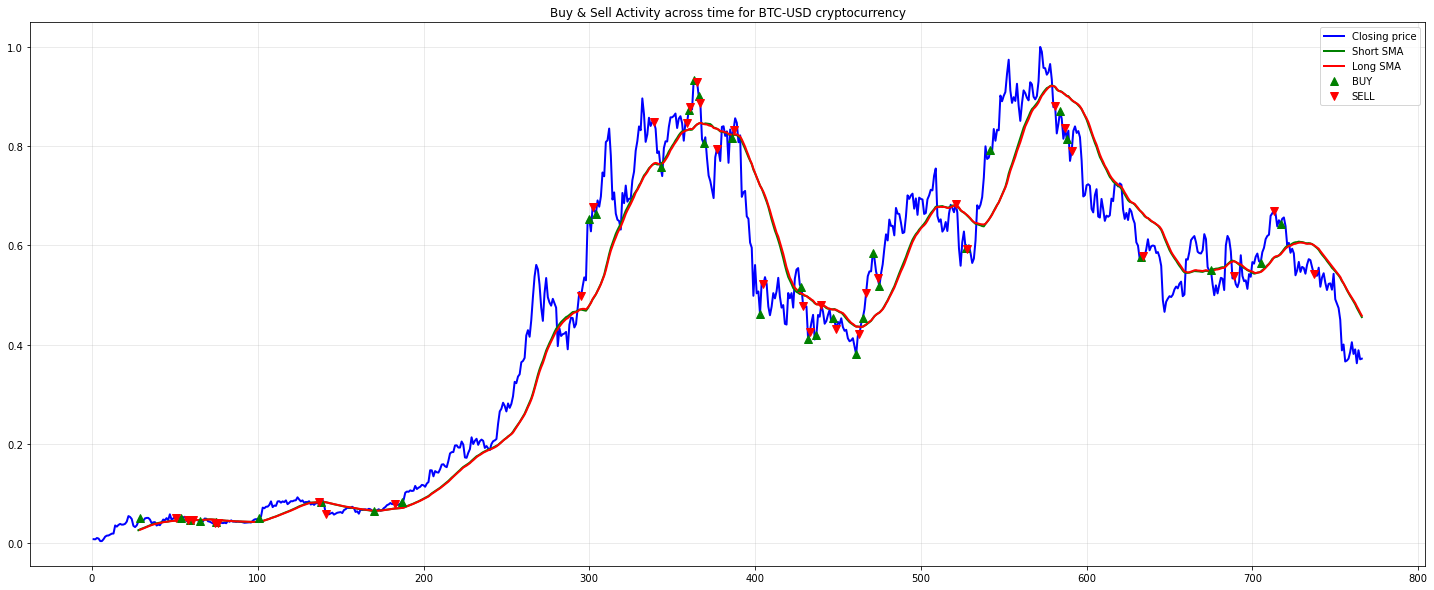

--------------------------------------------------


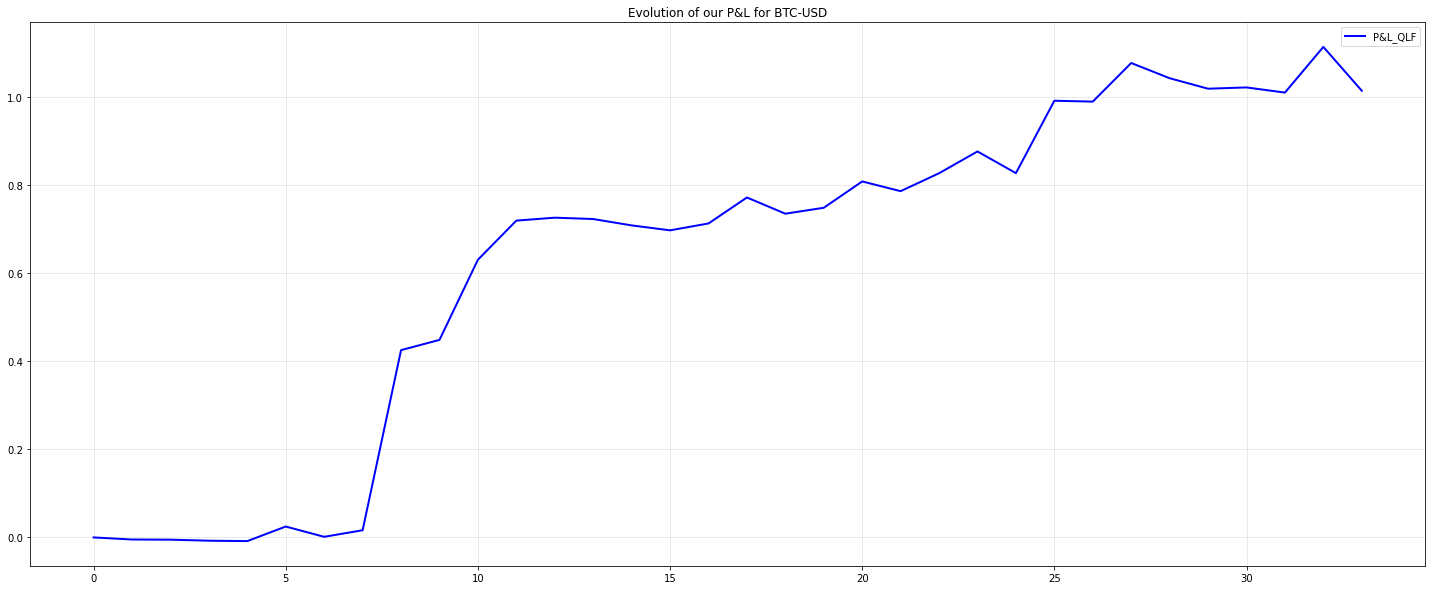

--------------------------------------------------
****************************************************************************************************
****************************************************************************************************


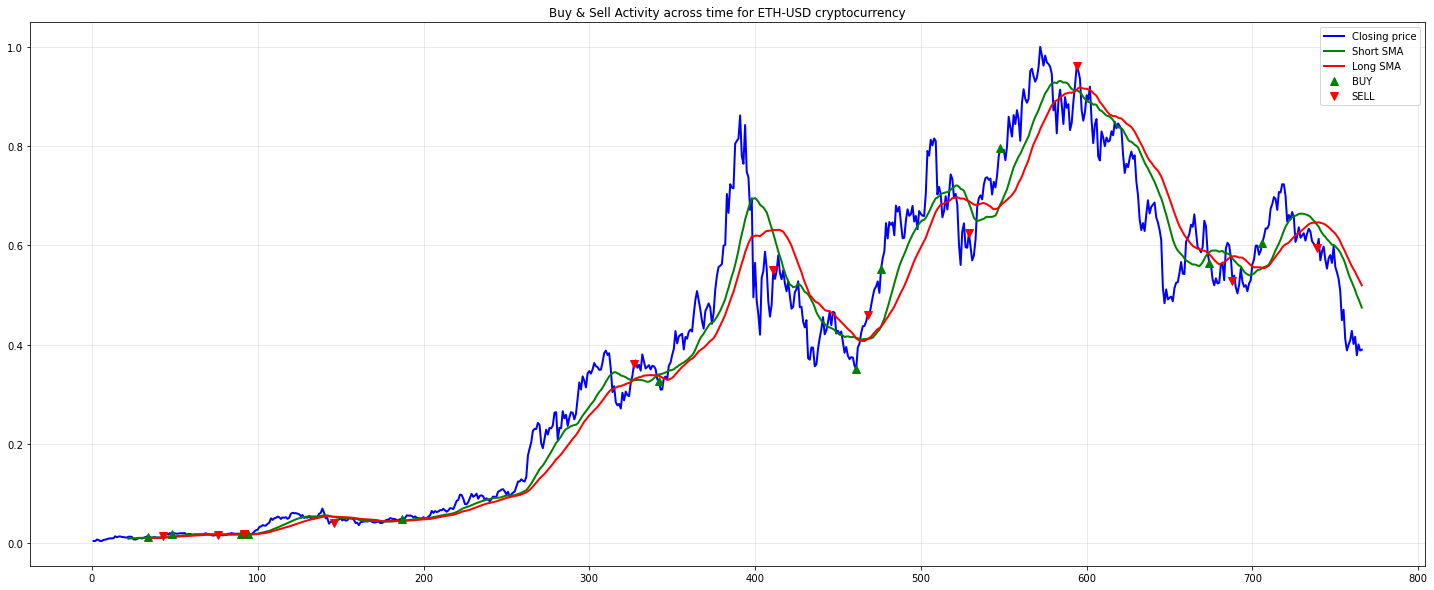

--------------------------------------------------


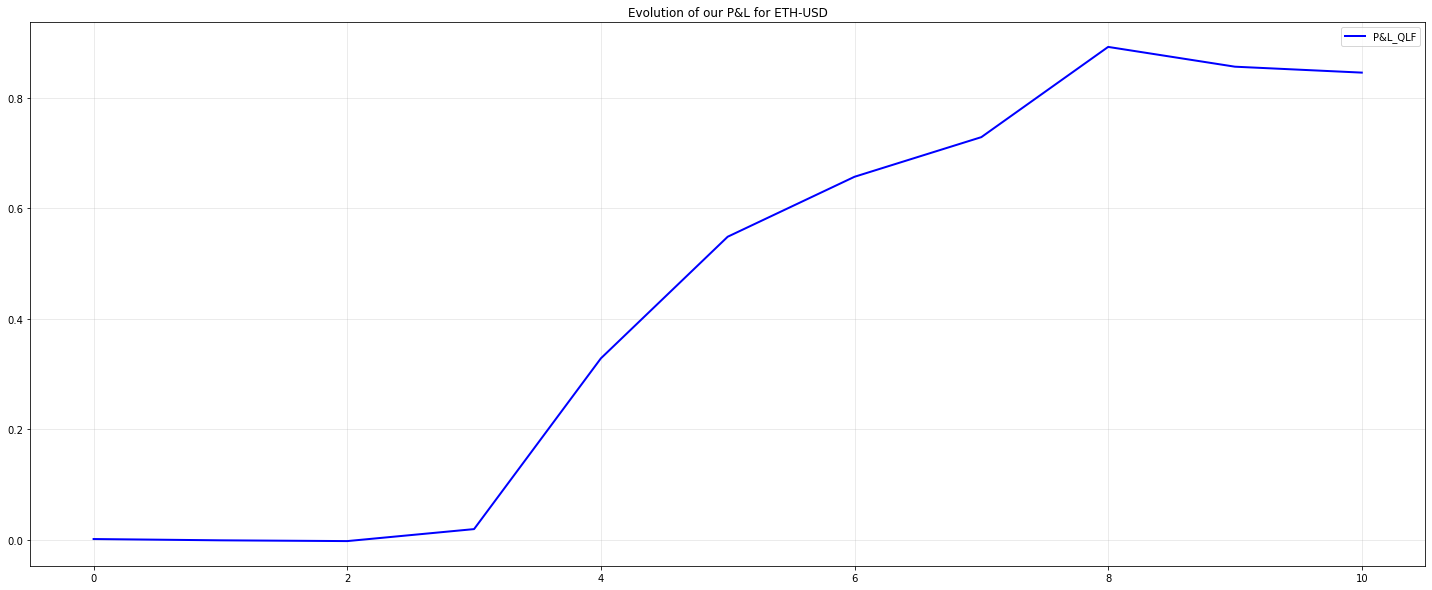

--------------------------------------------------
****************************************************************************************************
****************************************************************************************************


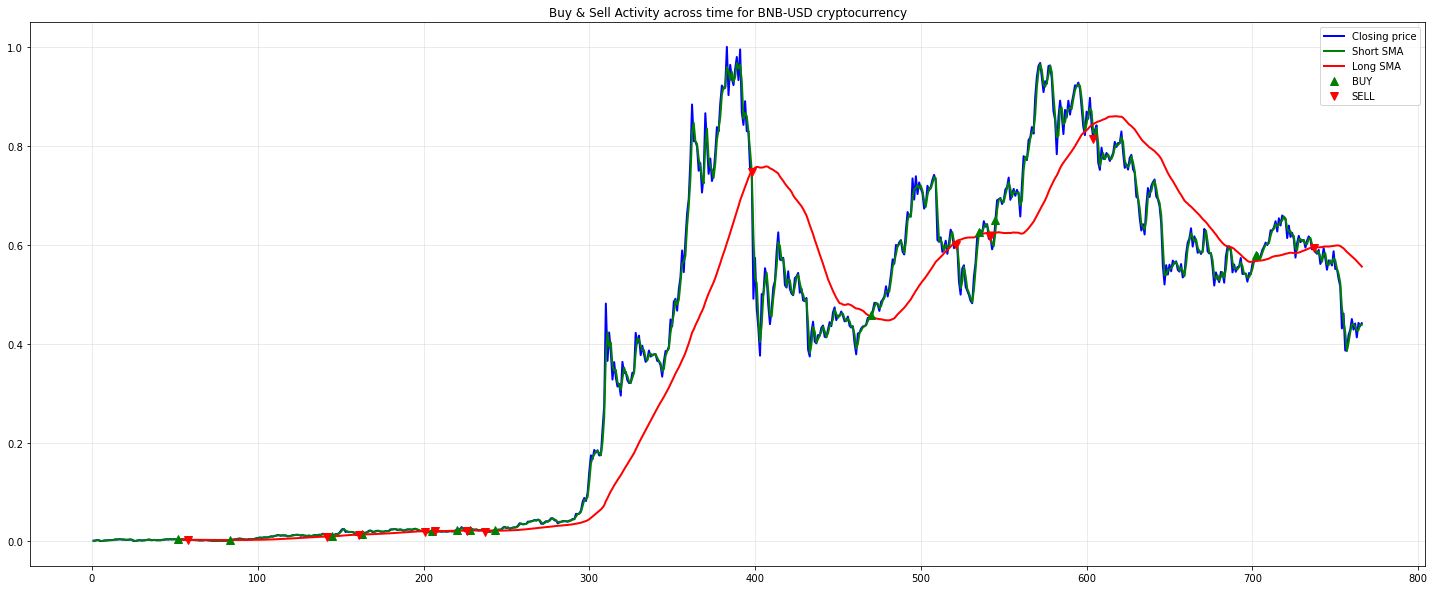

--------------------------------------------------


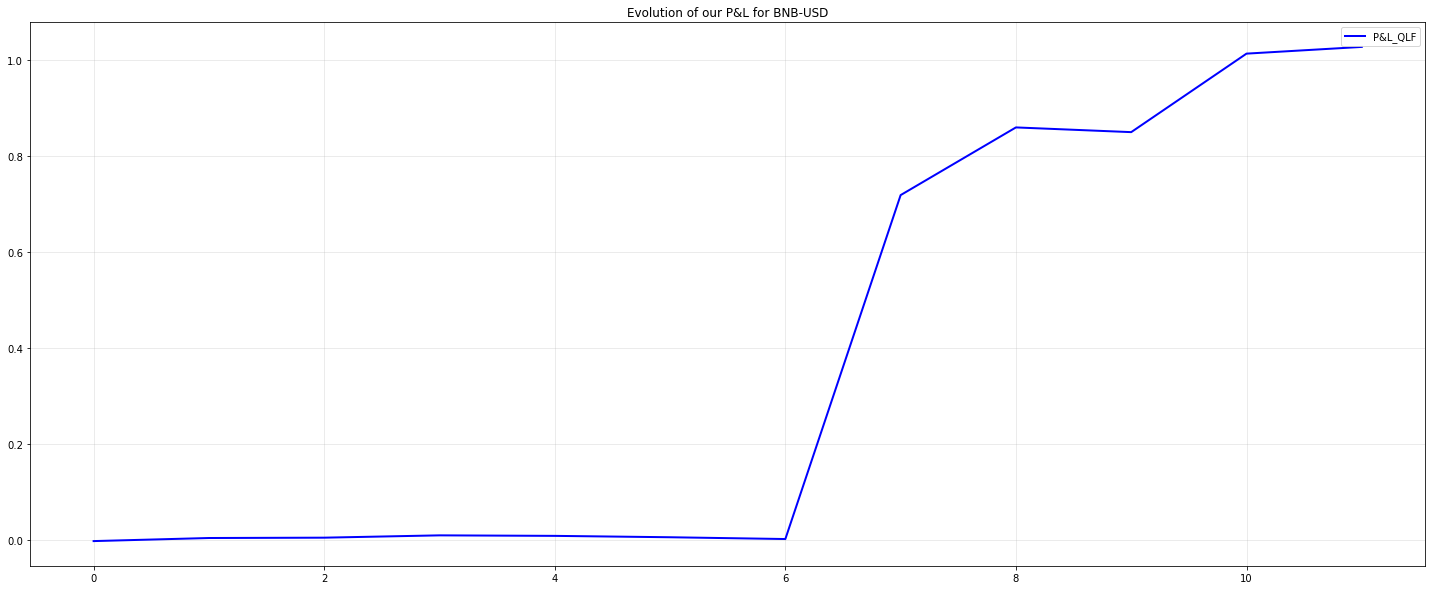

--------------------------------------------------
****************************************************************************************************
****************************************************************************************************


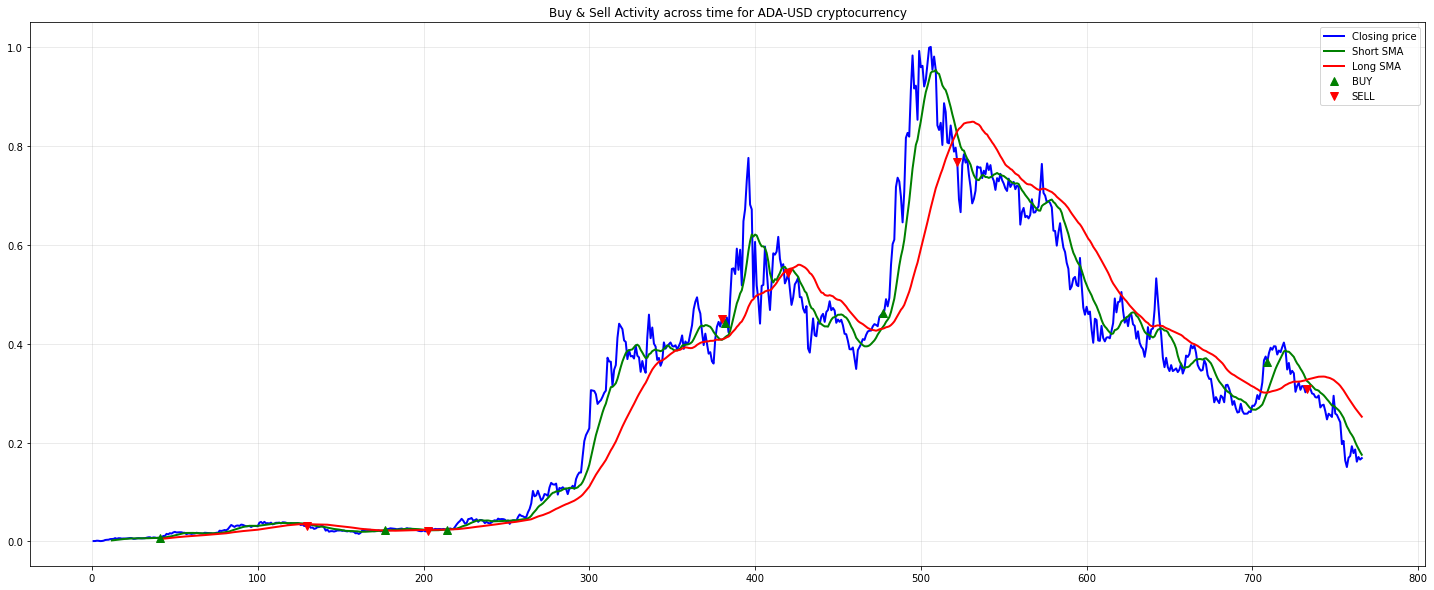

--------------------------------------------------


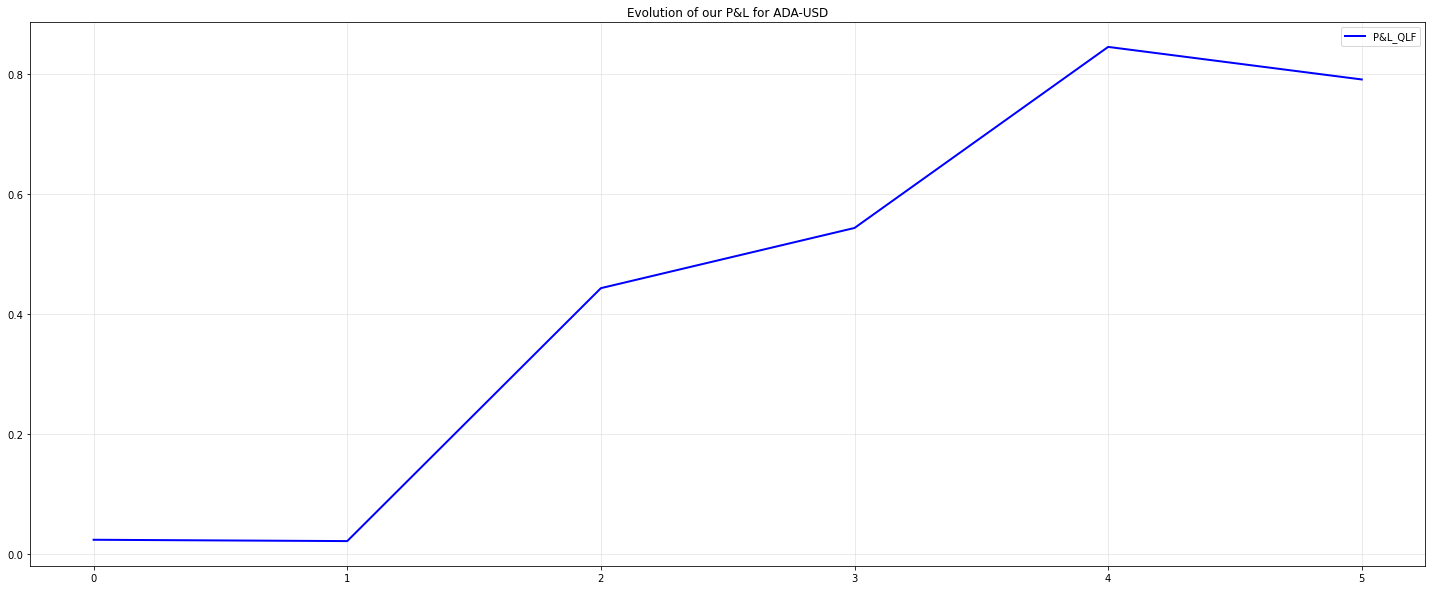

--------------------------------------------------
****************************************************************************************************
****************************************************************************************************


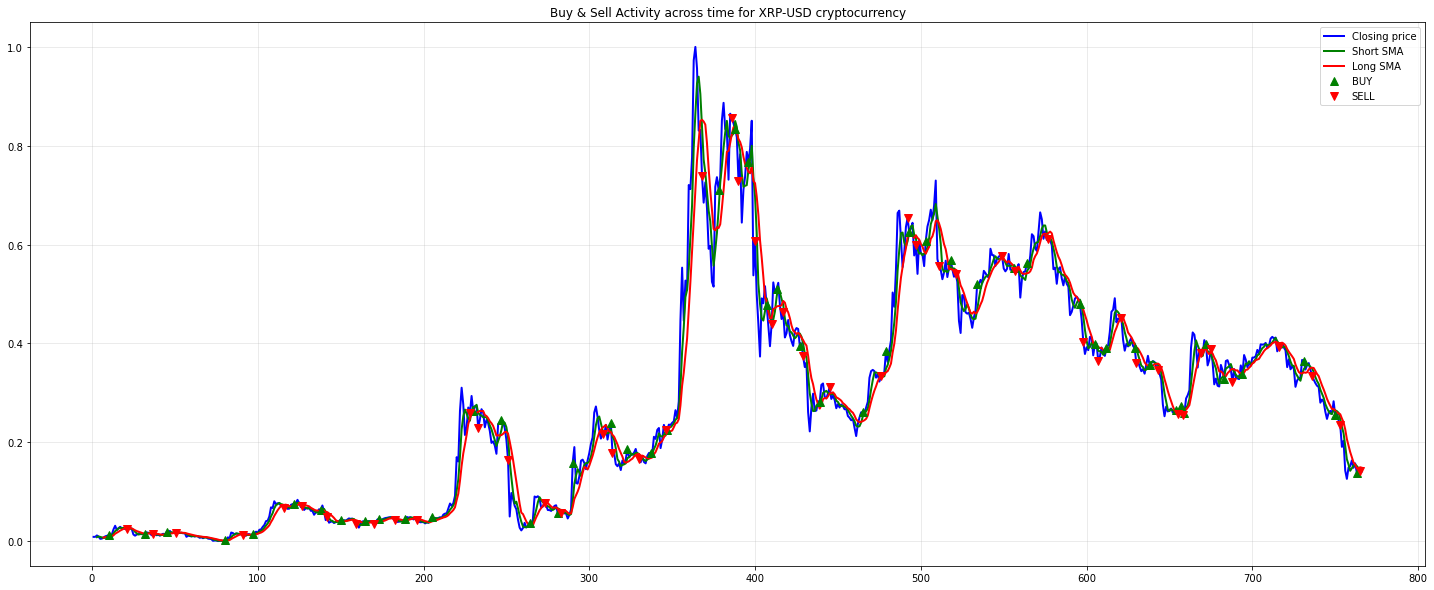

--------------------------------------------------


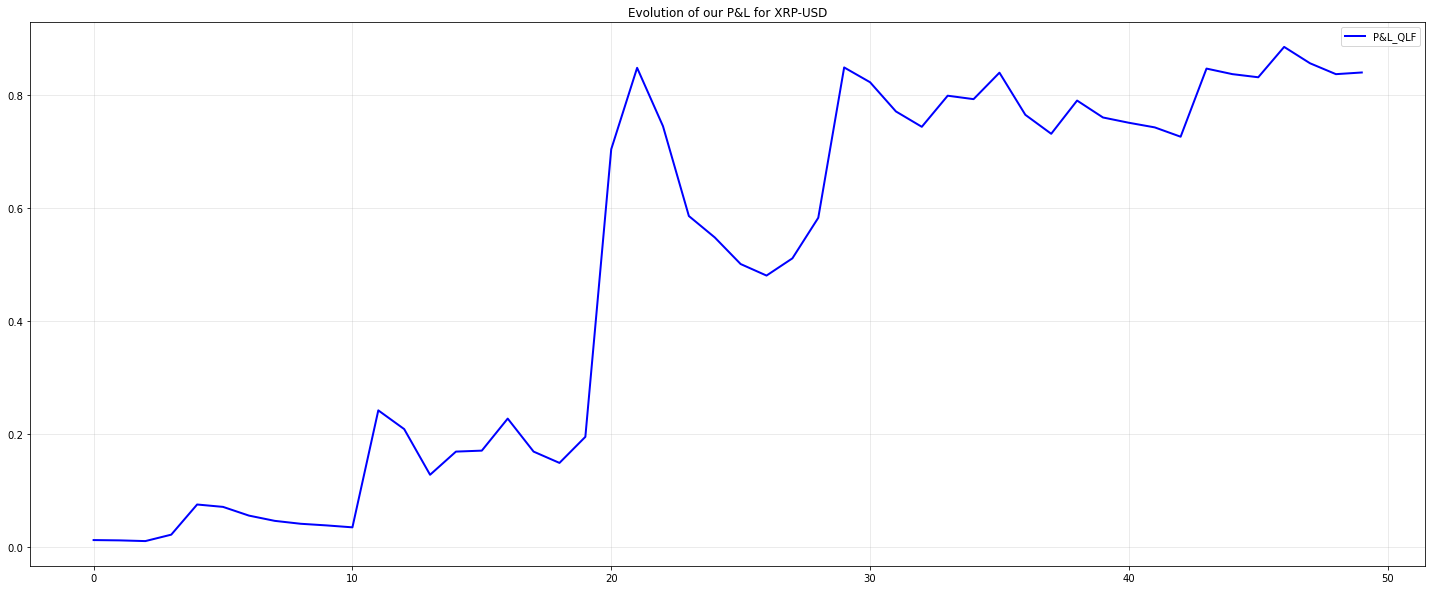

--------------------------------------------------
****************************************************************************************************
****************************************************************************************************


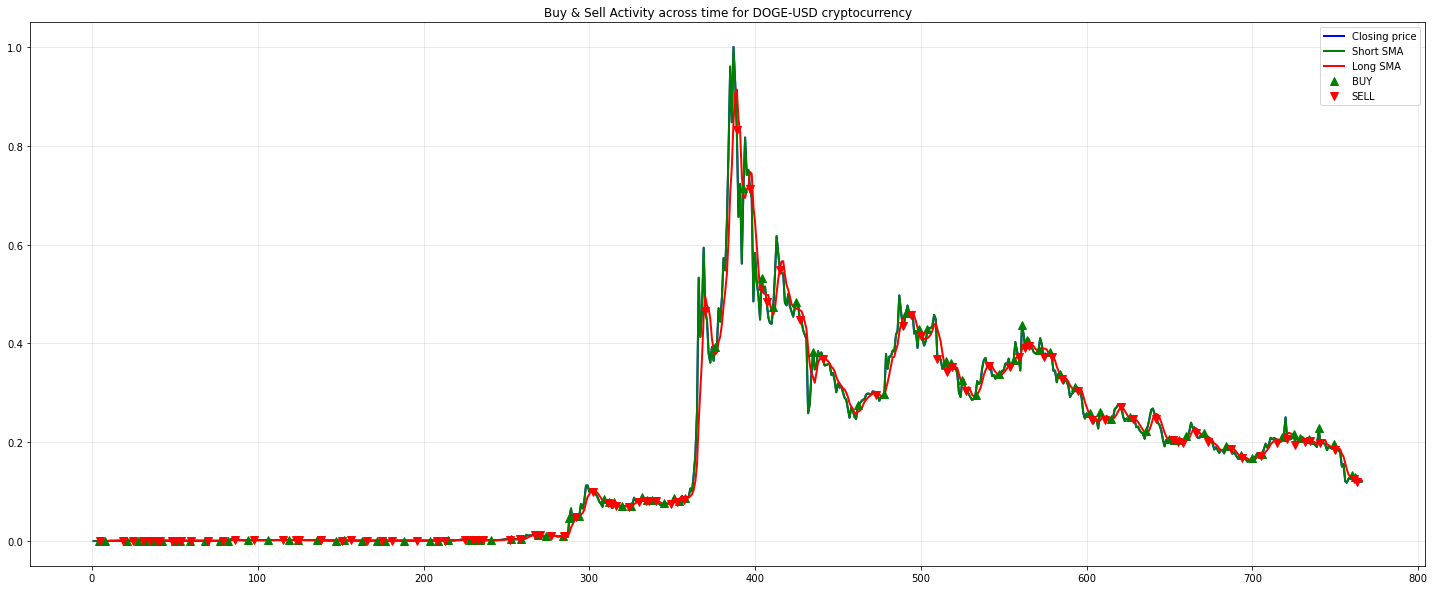

--------------------------------------------------


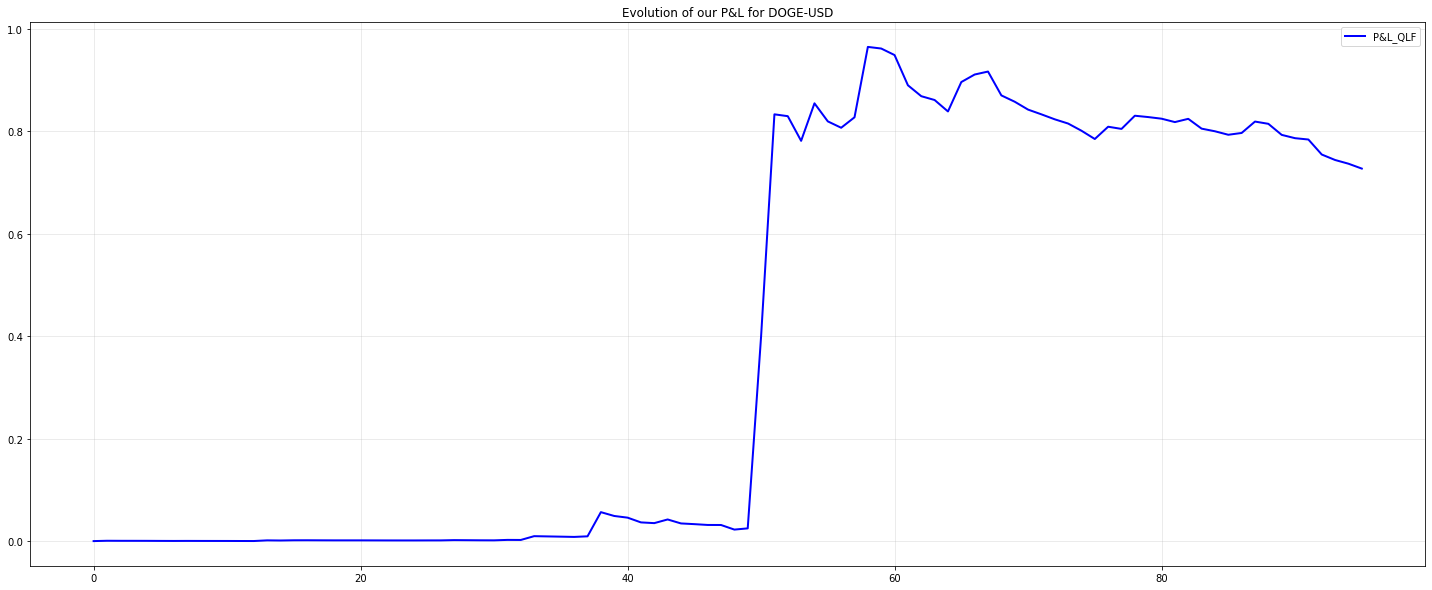

--------------------------------------------------
****************************************************************************************************
****************************************************************************************************


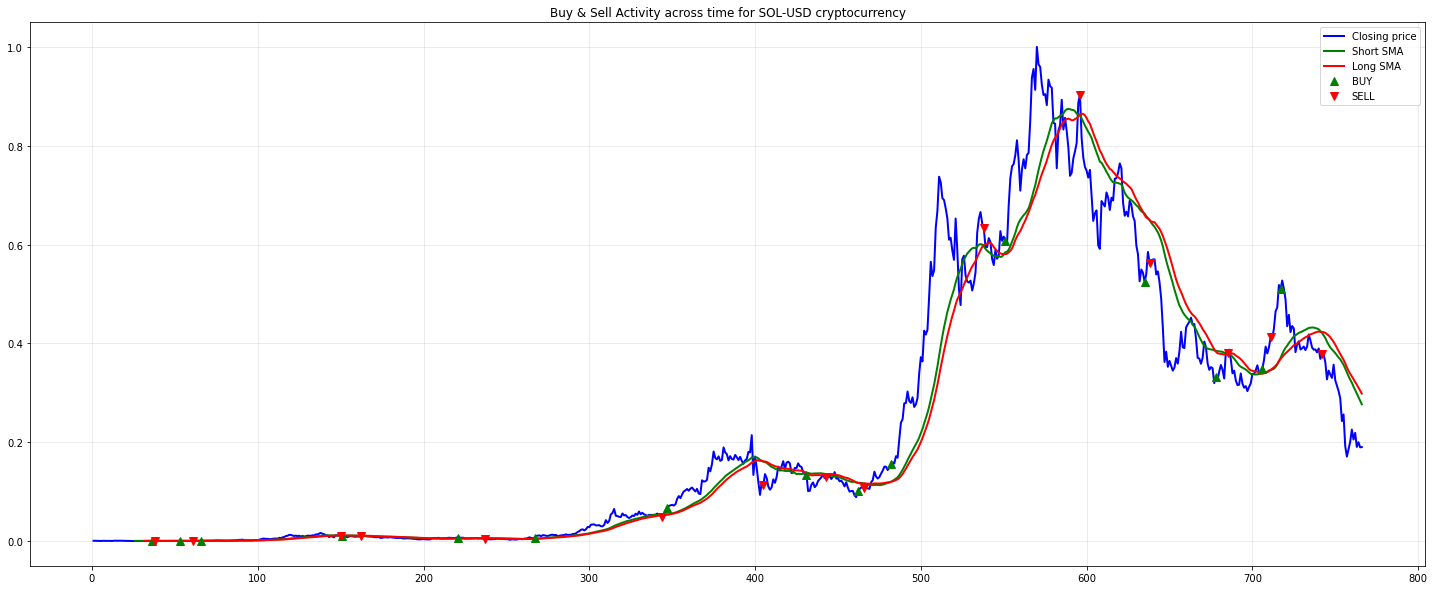

--------------------------------------------------


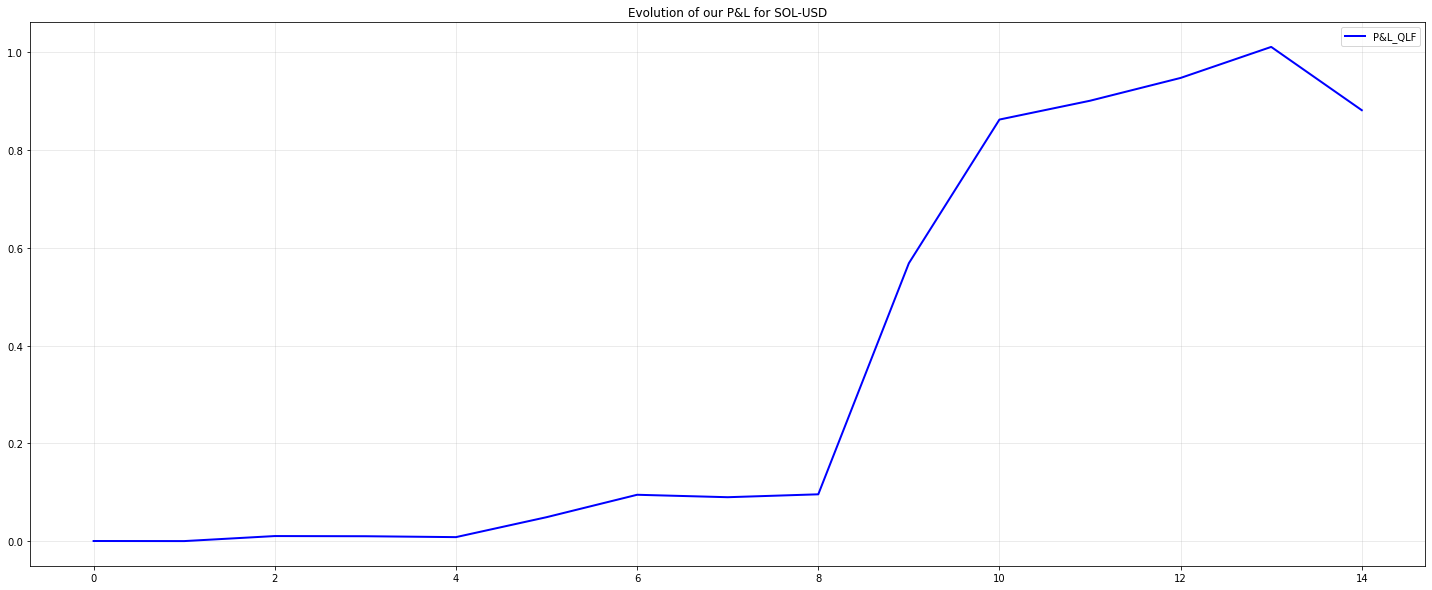

--------------------------------------------------
****************************************************************************************************
****************************************************************************************************


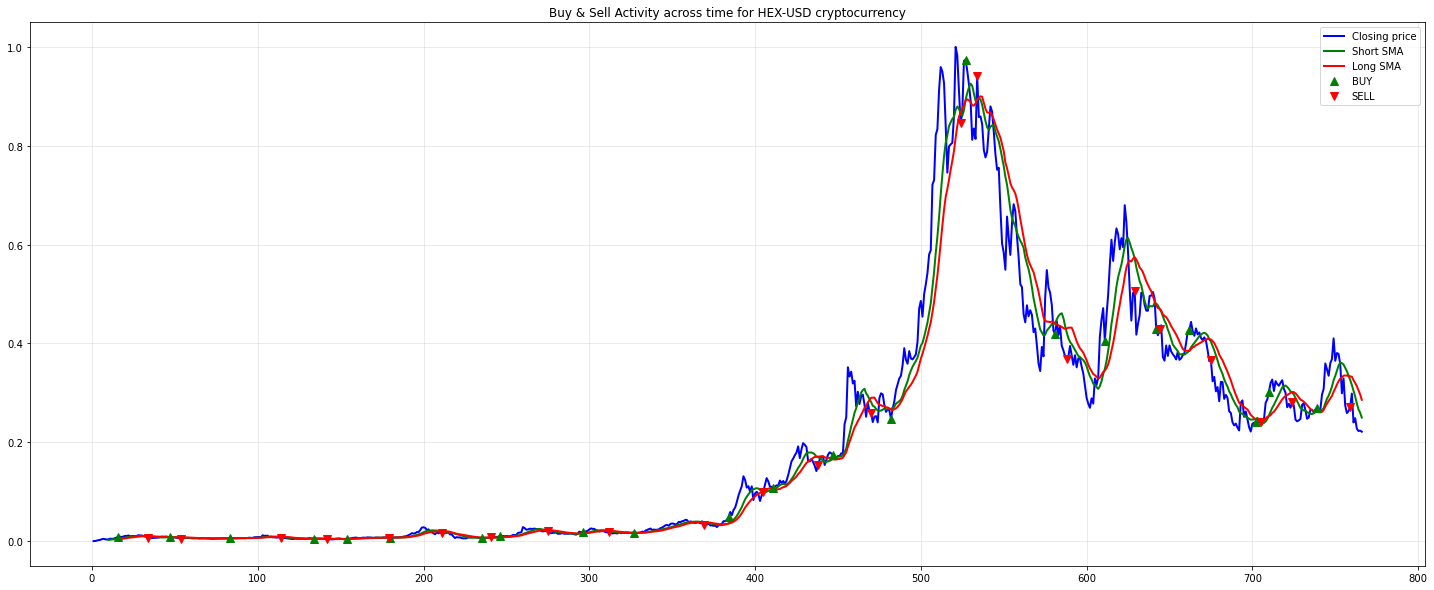

--------------------------------------------------


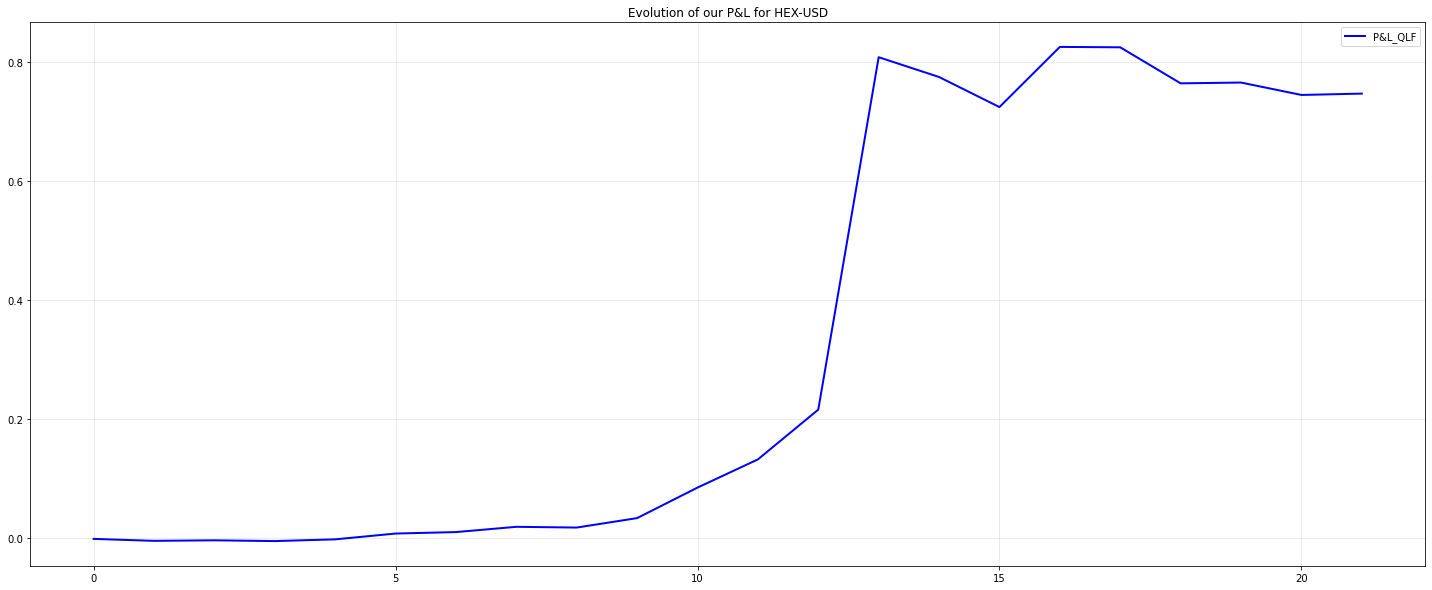

--------------------------------------------------
****************************************************************************************************


In [22]:
# The following is the previous opt for presentation
# d={'BTC-USD': [31, 36], 'ETH-USD': [34, 36], 
#    'BNB-USD': [7, 42], 'ADA-USD': [11, 33], 'XRP-USD': [47, 97],
#    'DOGE-USD': [10, 20], 'SOL-USD': [29, 30], 'HEX-USD': [8, 16]}

results= {}
for tick in d.keys():
     results[tick] = CrossSMA_PL(tick, d[tick], display=True)
        
res=pd.DataFrame.from_dict(results, orient='index', columns=['P&L', 'HPR HOLD', 'TODAY POSITION'])


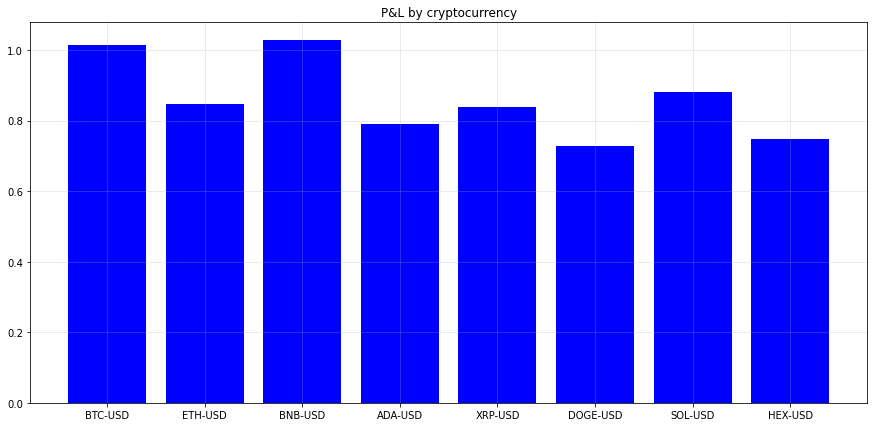

In [23]:
## Plot the P&L by cryptocurrency
res_pl = res['P&L']
fig = plt.figure(figsize = (15,7))
plt.grid(True,alpha = 0.3)
plt.bar(res_pl.index,res_pl.values,color='blue')
plt.title('P&L by cryptocurrency')
plt.show()


In [24]:
## Get today's position
res_pos = res['TODAY POSITION']
res_pos

BTC-USD     STAY AWAY
ETH-USD     STAY AWAY
BNB-USD     STAY AWAY
ADA-USD     STAY AWAY
XRP-USD     STAY AWAY
DOGE-USD    STAY AWAY
SOL-USD     STAY AWAY
HEX-USD     STAY AWAY
Name: TODAY POSITION, dtype: object

In [28]:
pd.DataFrame.from_dict(d, orient='index', columns=['ShortSMA','LongSMA'])

,ShortSMA,LongSMA
BTC-USD,29,30
ETH-USD,23,35
BNB-USD,2,53
ADA-USD,13,42
XRP-USD,4,8
DOGE-USD,1,5
SOL-USD,27,33
HEX-USD,11,17
